# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

## libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Using pandas reading the audit_risk and trial.csv.

In [2]:
audit_risk_df = pd.read_csv("audit_risk.csv")
trial_df = pd.read_csv("trial.csv")
audit_risk_df.T


,0,1,2,3,4,5,6,7,8,9,...,766,767,768,769,770,771,772,773,774,775
Sector_score,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,...,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57
LOCATION_ID,23,6,6,6,6,6,7,8,8,8,...,8,18,9,16,18,9,16,14,18,15
PARA_A,4.18,0,0.51,0,0,0,1.1,8.5,8.4,3.98,...,0.8,0.36,0.44,0.51,0.75,0.49,0.47,0.24,0.2,0
Score_A,0.6,0.2,0.2,0.2,0.2,0.2,0.4,0.6,0.6,0.6,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Risk_A,2.508,0,0.102,0,0,0,0.44,5.1,5.04,2.388,...,0.16,0.072,0.088,0.102,0.15,0.098,0.094,0.048,0.04,0
PARA_B,2.5,4.83,0.23,10.8,0.08,0.83,7.41,12.03,11.05,0.99,...,0.57,0.54,0.53,0.5,0.45,0.4,0.37,0.04,0,0
Score_B,0.2,0.2,0.2,0.6,0.2,0.2,0.4,0.6,0.6,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Risk_B,0.5,0.966,0.046,6.48,0.016,0.166,2.964,7.218,6.63,0.198,...,0.114,0.108,0.106,0.1,0.09,0.08,0.074,0.008,0,0
TOTAL,6.68,4.83,0.74,10.8,0.08,0.83,8.51,20.53,19.45,4.97,...,1.37,0.9,0.97,1.01,1.2,0.89,0.84,0.28,0.2,0
numbers,5,5,5,6,5,5,5,5.5,5.5,5,...,5,5,5,5,5,5,5,5,5,5


In [3]:
audit_risk_df.rename(columns={'PROB': 'PROB1'}, inplace=True)

In [4]:
print(audit_risk_df.columns)
print(trial_df.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB1', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


# After reading the two datasets the following observations were made : 

## Detection_Risk is a constant value 

Dropping the Detection Risk column as it has a variance of zero.

In [5]:
audit_risk_df = audit_risk_df.drop("Detection_Risk", axis = 1)

In [6]:
trial_df


,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.5000,2,6.6800,5.0,2,3.380,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.8300,2,4.8300,5.0,2,0.940,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.2300,2,0.7400,5.0,2,0.000,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.8000,6,10.8000,6.0,6,11.750,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.0800,2,0.0800,5.0,2,0.000,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.8300,2,0.8300,5.0,2,2.950,2,2,0,2,0,2,2.0,0
6,3.89,7,1.10,4,7.4100,4,8.5100,5.0,2,44.950,6,2,0,2,0,2,3.2,1
7,3.89,8,8.50,6,12.0300,6,20.5300,5.5,4,7.790,4,2,0,2,0,2,4.2,1
8,3.89,8,8.40,6,11.0500,6,19.4500,5.5,4,7.340,4,2,0,2,0,2,4.2,1
9,3.89,8,3.98,6,0.9900,2,4.9700,5.0,2,1.930,2,2,0,2,0,2,2.4,1


## SCORE_A and SCORE_B in trial_df are 10* Score_A and 10*Score_B of audit_risk_df

In [7]:
audit_risk_df.head(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB1,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0


In [8]:
audit_risk_df["Money_Value"].head(2)

0    3.38
1    0.94
Name: Money_Value, dtype: float64

### If the Score_A and Score_B values are adjusted, all common columns except 'Risk' hold the same value with the df observations in the same sequence

Common columns:

c_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score', 'Risk']
       
Columns in trial_df but not in audit_risk_df:

only_in_trial_cols = ['Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score']

In [9]:
audit_risk_df["Score_A"] = audit_risk_df["Score_A"]*10
audit_risk_df["Score_B"] = audit_risk_df["Score_B"]*10

In [10]:


c_with_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score', 'Risk']
c_without_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score']
c_with_risk_cols_upper = [x.upper() for x in c_with_risk_cols]
c_without_risk_cols_upper = [x.upper() for x in c_without_risk_cols]

audit_names = audit_risk_df.columns
audit_names_upper =  [x.upper() for x in audit_names]
audit_risk_df.columns = audit_names_upper

trial_names = trial_df.columns
trial_names_upper =  [x.upper() for x in trial_names]
trial_df.columns = trial_names_upper



In [11]:
# c_with_risk_cols will result in an inner merge (~580 observations on dropping duplicates)
 

risk_df = audit_risk_df.merge(trial_df, on=c_without_risk_cols_upper)
risk_df.shape
risk_df = risk_df.drop_duplicates()
risk_df.shape

(763, 33)

In [12]:
risk_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'RISK_x', 'MARKS', 'MONEY_MARKS', 'DISTRICT', 'LOSS',
       'LOSS_SCORE', 'HISTORY_SCORE', 'RISK_y'],
      dtype='object')

### Checking for the null values in the final merged data

In [13]:
risk_df.isna().any()

SECTOR_SCORE     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
RISK_A           False
PARA_B           False
SCORE_B          False
RISK_B           False
TOTAL            False
NUMBERS          False
SCORE_B.1        False
RISK_C           False
MONEY_VALUE       True
SCORE_MV         False
RISK_D           False
DISTRICT_LOSS    False
PROB1            False
RISK_E           False
HISTORY          False
PROB             False
RISK_F           False
SCORE            False
INHERENT_RISK    False
CONTROL_RISK     False
AUDIT_RISK       False
RISK_x           False
MARKS            False
MONEY_MARKS      False
DISTRICT         False
LOSS             False
LOSS_SCORE       False
HISTORY_SCORE    False
RISK_y           False
dtype: bool

######  In the MONEY_VALUE feature  one null value present. So central imputation is done where the null value is replaced by the mean of the values of that feature.

In [14]:
 ##Central Imputation

risk_df['MONEY_VALUE'] = risk_df["MONEY_VALUE"].fillna(risk_df["MONEY_VALUE"].mean())

risk_df.isnull().any()

SECTOR_SCORE     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
RISK_A           False
PARA_B           False
SCORE_B          False
RISK_B           False
TOTAL            False
NUMBERS          False
SCORE_B.1        False
RISK_C           False
MONEY_VALUE      False
SCORE_MV         False
RISK_D           False
DISTRICT_LOSS    False
PROB1            False
RISK_E           False
HISTORY          False
PROB             False
RISK_F           False
SCORE            False
INHERENT_RISK    False
CONTROL_RISK     False
AUDIT_RISK       False
RISK_x           False
MARKS            False
MONEY_MARKS      False
DISTRICT         False
LOSS             False
LOSS_SCORE       False
HISTORY_SCORE    False
RISK_y           False
dtype: bool

###  Type conversion

Location ID that holds three string values and rest in the form of numeric values is a categorical attribute

In [15]:
risk_df = risk_df.copy()

# Check type conversions
risk_df.dtypes

SECTOR_SCORE     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A          float64
RISK_A           float64
PARA_B           float64
SCORE_B          float64
RISK_B           float64
TOTAL            float64
NUMBERS          float64
SCORE_B.1        float64
RISK_C           float64
MONEY_VALUE      float64
SCORE_MV         float64
RISK_D           float64
DISTRICT_LOSS      int64
PROB1            float64
RISK_E           float64
HISTORY            int64
PROB             float64
RISK_F           float64
SCORE            float64
INHERENT_RISK    float64
CONTROL_RISK     float64
AUDIT_RISK       float64
RISK_x             int64
MARKS              int64
MONEY_MARKS        int64
DISTRICT           int64
LOSS               int64
LOSS_SCORE         int64
HISTORY_SCORE      int64
RISK_y             int64
dtype: object

   Here since there are 3 string values for LOCATION_ID which are replaced with a unique numbers.

In [16]:
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("LOHARU", 45)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("NUH", 46)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("SAFIDON", 47)

In [17]:
risk_df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 45, 46, 47, '43', '44', '17'],
      dtype=object)

## Removing  Outliers

#### Analyzation of  the outliers and removing them.

In [18]:
risk_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,19.721311,2.491298,3.538663,1.373919,10.983474,3.150721,6.441822,13.442532,5.068807,0.224115,...,0.574574,7.284109,0.398427,2.241153,2.925295,2.508519,0.030144,2.062910,2.170380,0.635649
std,24.132399,5.718259,1.743985,3.465152,50.489113,1.705967,30.316831,51.719679,0.266546,0.080974,...,0.447253,38.985618,0.489895,0.809740,1.606557,1.230994,0.185804,0.378178,0.685288,0.481563
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.260000,2.000000,0.052000,0.000000,2.000000,0.000000,0.590000,5.000000,0.200000,...,0.400000,0.318600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.440000,2.000000,0.088000,1.420000,5.000000,0.200000,...,0.400000,0.590000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.515000,6.000000,1.509000,4.365000,4.000000,2.104000,7.990000,5.000000,0.200000,...,0.400000,3.452800,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,1264.630000,6.000000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


Here in the above description it is observed that some of the columns like PARA_B, TOTAL, RSIK_B are having the outliers as their respective maximum values are greater than the value of their 3rd quartile. Hence there are outliers present for these columns.

###### Plotting the boxplot to observe the outliers. 


{'whiskers': [<matplotlib.lines.Line2D at 0x12140bd68>,
 'caps': [<matplotlib.lines.Line2D at 0x121423438>,
 'boxes': [<matplotlib.lines.Line2D at 0x12140bc18>],
 'medians': [<matplotlib.lines.Line2D at 0x121423ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x121423e10>],
 'means': []}

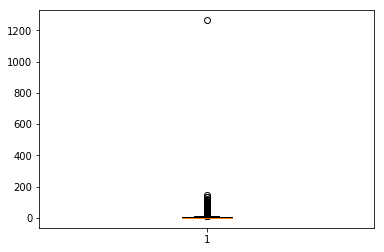

In [19]:
plt.boxplot(risk_df['PARA_B'])

Here we observe that there is only one observation which is the outlier for the column PARA_B.

In [20]:
risk_df[risk_df['PARA_B']==1264.630000]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
241,2.72,2,4.28,6.0,2.568,1264.63,6.0,758.778,1268.91,5.5,...,2.4,961.5144,1,4,6,6,0,2,6,1


In [21]:
risk_df.shape

(763, 33)


##### Removing the outlier for the PARA_B column

In [22]:
outlier =risk_df[risk_df.PARA_B != 1264.630000]

###### In the below boxplot it is observed that there are no more outliers for PARA_B column

{'whiskers': [<matplotlib.lines.Line2D at 0x1214a9080>,
 'caps': [<matplotlib.lines.Line2D at 0x1214a9748>,
 'boxes': [<matplotlib.lines.Line2D at 0x12149fef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1214a9dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1214b2160>],
 'means': []}

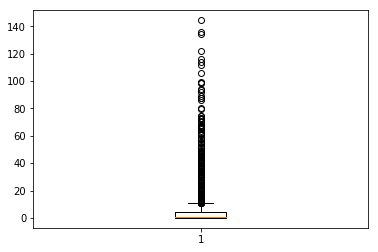

In [23]:
plt.boxplot(outlier['PARA_B'])

In [24]:
outlier[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,762.000000,762.000000
mean,14.320450,8.370946
std,67.127781,40.310310
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.110000,0.021000
75%,5.965000,2.309000
max,935.030000,561.018000


##### Removing the rest of the outliers

In [25]:
outlier[(outlier['INHERENT_RISK'] == 622.838000) | (outlier['TOTAL'] == 191.360000) | (outlier['MONEY_VALUE'] == 935.030000) |(outlier['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
39,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.4,115.5016,1,2,6,2,0,2,2,1
344,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.4,124.5676,1,2,6,2,0,2,2,1


In [26]:
final_df = outlier[(outlier['INHERENT_RISK'] != 622.838000) & (outlier['TOTAL'] != 191.360000) & (outlier['MONEY_VALUE'] != 935.030000) & (outlier['RISK_D'] != 561.018000)]

In [27]:
final_df

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,0.4,1.714800,1,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,0.4,0.510800,0,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,0.4,0.309600,0,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,0.4,3.506000,1,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,0.4,0.283200,0,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,0.4,0.431200,0,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,0.4,6.354800,1,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,0.4,3.606800,1,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,0.4,3.441200,1,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,0.4,0.874400,0,2,2,2,0,2,2,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1237a4748>,
 'caps': [<matplotlib.lines.Line2D at 0x1237a4e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1237a45f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1237b04e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1237b0828>],
 'means': []}

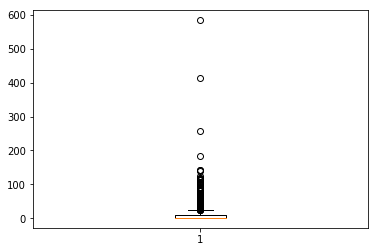

In [28]:
plt.boxplot(final_df['INHERENT_RISK'])

In [29]:
final_df.shape

(760, 33)

Here it is observed that on merging the two dataframes there would be two columns formed for the risk as the risk columns and values are different for both the dataframes. Hence by performing the OR operation the RISK column is built.  

In [30]:
final_df['RISK'] = final_df['RISK_x'] | final_df['RISK_y']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
final_df = final_df.drop(['RISK_x','RISK_y'],axis=1)

In [32]:
final_df

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,8.57400,0.4,1.714800,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,2.55400,0.4,0.510800,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,1.54800,0.4,0.309600,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,17.53000,0.4,3.506000,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,1.41600,0.4,0.283200,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,2.15600,0.4,0.431200,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,31.77400,0.4,6.354800,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,18.03400,0.4,3.606800,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,17.20600,0.4,3.441200,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,4.37200,0.4,0.874400,2,2,2,0,2,2,1


In [33]:
final_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.787842,2.409974,3.528947,1.324648,9.163488,3.139474,5.349245,11.541094,5.068421,0.223947,...,15.393907,0.572632,5.731831,2.239474,2.913158,2.505263,0.030263,2.063158,2.165789,0.634211
std,24.156673,5.372002,1.740536,3.257894,21.567462,1.699886,12.982757,23.734227,0.266590,0.080873,...,36.681740,0.443116,17.036510,0.808727,1.598034,1.226615,0.186161,0.378904,0.672351,0.481968
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,1.400000,0.400000,0.280000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.257500,2.000000,0.051500,0.000000,2.000000,0.000000,0.587500,5.000000,0.200000,...,1.592000,0.400000,0.318400,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.435000,2.000000,0.087000,1.420000,5.000000,0.200000,...,2.228000,0.400000,0.586000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.482500,6.000000,1.489500,4.170000,4.000000,1.995000,7.767500,5.000000,0.200000,...,10.782000,0.400000,3.262500,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,144.390000,6.000000,86.634000,148.230000,9.000000,0.600000,...,583.688000,5.800000,222.009600,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 809
Data columns (total 32 columns):
SECTOR_SCORE     760 non-null float64
LOCATION_ID      760 non-null object
PARA_A           760 non-null float64
SCORE_A          760 non-null float64
RISK_A           760 non-null float64
PARA_B           760 non-null float64
SCORE_B          760 non-null float64
RISK_B           760 non-null float64
TOTAL            760 non-null float64
NUMBERS          760 non-null float64
SCORE_B.1        760 non-null float64
RISK_C           760 non-null float64
MONEY_VALUE      760 non-null float64
SCORE_MV         760 non-null float64
RISK_D           760 non-null float64
DISTRICT_LOSS    760 non-null int64
PROB1            760 non-null float64
RISK_E           760 non-null float64
HISTORY          760 non-null int64
PROB             760 non-null float64
RISK_F           760 non-null float64
SCORE            760 non-null float64
INHERENT_RISK    760 non-null float64
CONTROL_RISK     760 non-n

In [35]:
import pandas as pd
import numpy as np


In [36]:
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'MARKS', 'MONEY_MARKS', 'DISTRICT', 'LOSS', 'LOSS_SCORE',
       'HISTORY_SCORE', 'RISK'],
      dtype='object')

It is observed that District loss and district have the same values and same affect on the target so dropping one of the two attributes (which is DISTRICT) is done.
It is also observed that MONEY_Marks and Score_MV differ by a constant factor which is the multiplication of 10 (i.e., SCORE_MV*10 is \MONEY_MARKS), so dropping the MONEY_MARKS attribute.  

In [37]:
final_df = final_df.drop(['MONEY_MARKS','DISTRICT'],axis=1)

In [38]:
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE', 'RISK'],
      dtype='object')

## Visualizations

##### Plotting the Sector_score vs Risk
 
The plot depicts which attributes of sector score which represents the highest and lowest risk.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

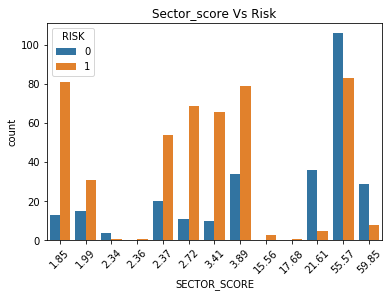

In [39]:
sns.countplot(x='SECTOR_SCORE',data=final_df[['SECTOR_SCORE','RISK']],
              hue="RISK").set_title("Sector_score Vs Risk")
plt.xticks(rotation=45)

#### Plotting of Risk for location_id
The plot depicts which attributes of sector score which represents the highest and lowest risk.
It can be observed that the risk is 1 for location with id 8,23,2, and 16

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

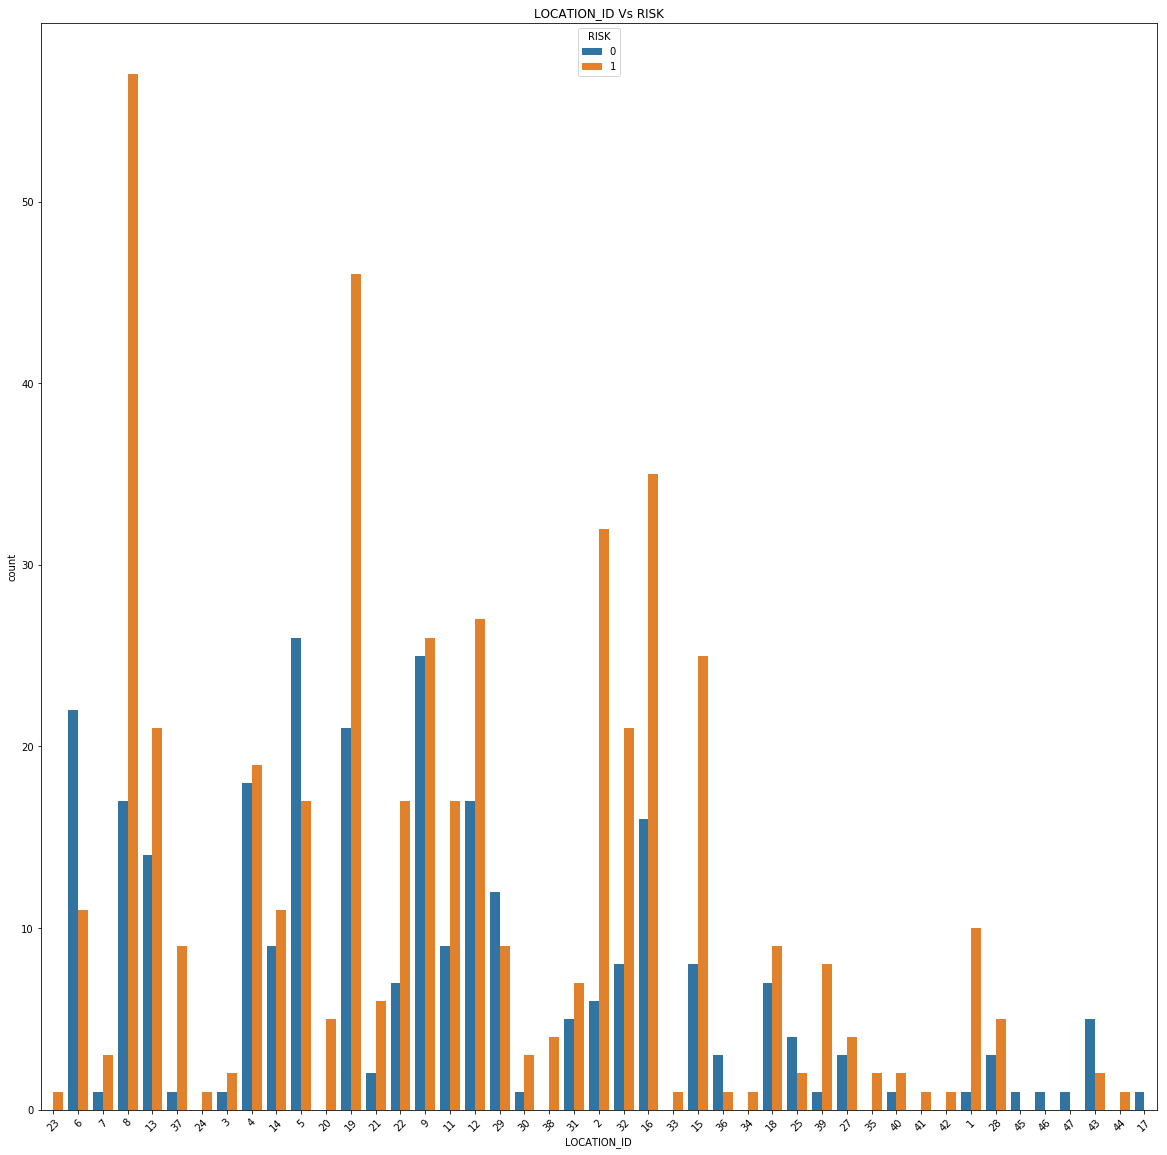

In [40]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='LOCATION_ID',data=final_df[['LOCATION_ID','RISK']],
              hue="RISK").set_title("LOCATION_ID Vs RISK")
plt.xticks(rotation=45)

#### Plot for History vs Risk
It is observed that for the zero history the risk is less i.e., risk is zero,

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

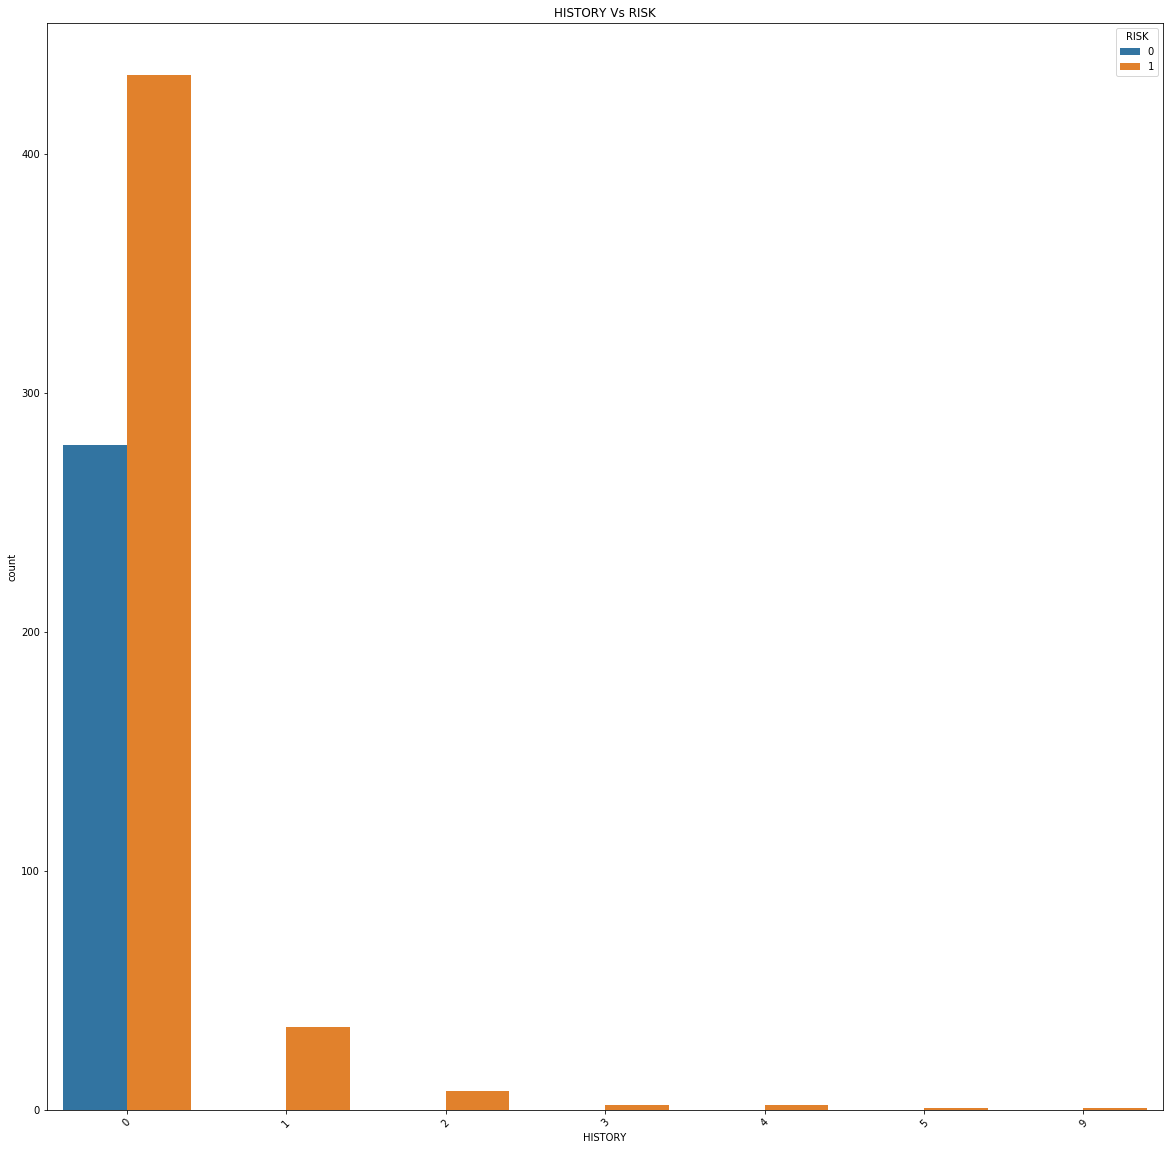

In [41]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='HISTORY',data=final_df[['HISTORY','RISK']],
              hue="RISK").set_title("HISTORY Vs RISK")
plt.xticks(rotation=45)

### Plot for District-LOSS vs Risk
It is observed that the District-loss =2 has less risk as risk=0.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

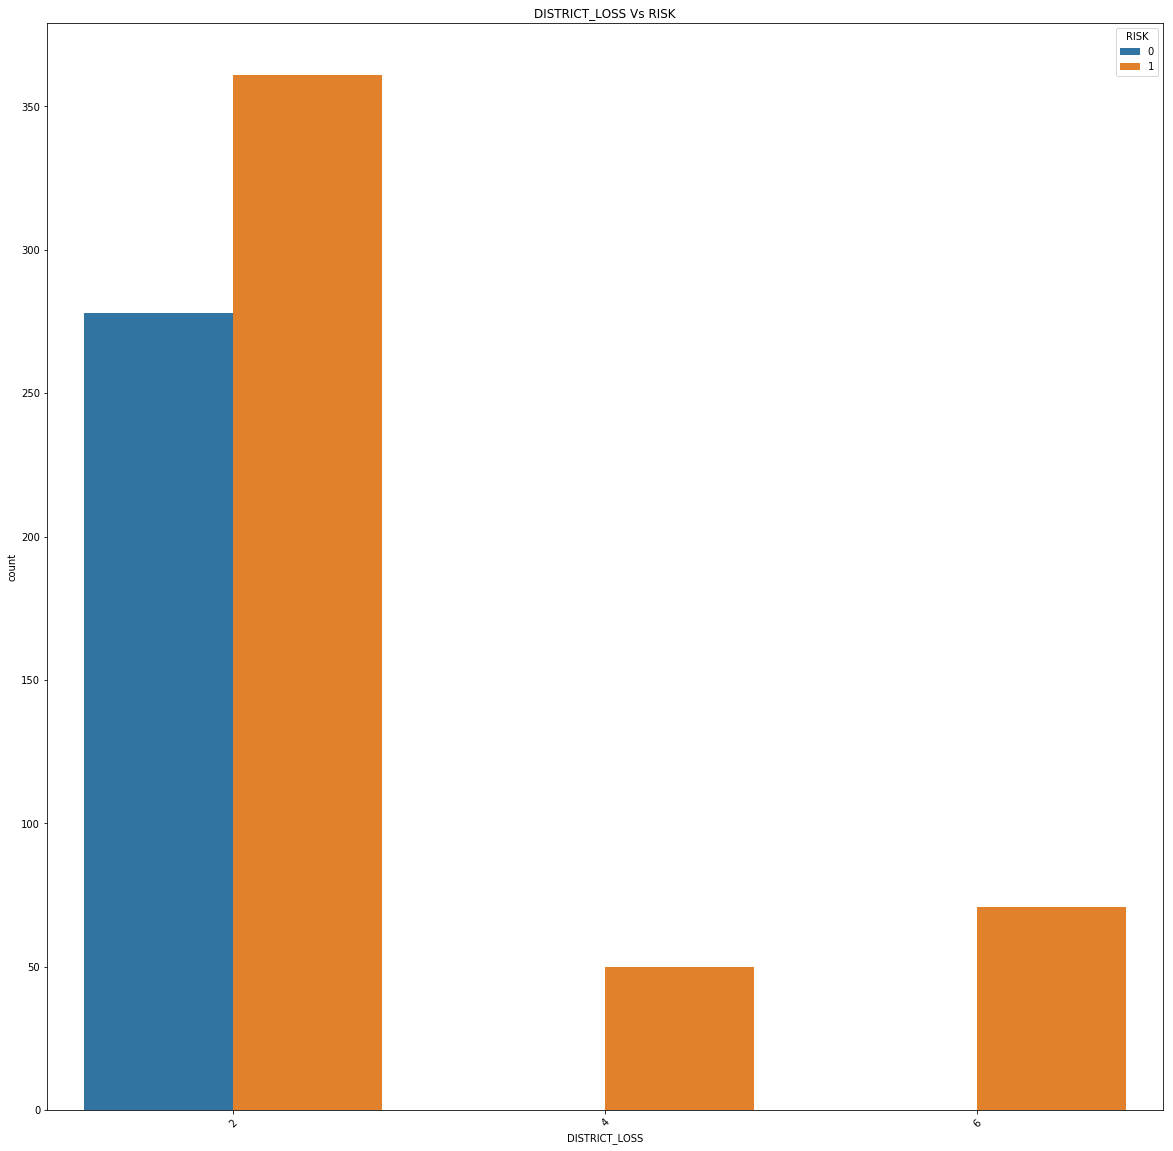

In [42]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='DISTRICT_LOSS',data=final_df[['DISTRICT_LOSS','RISK']],
              hue="RISK").set_title("DISTRICT_LOSS Vs RISK")
plt.xticks(rotation=45)

### Plot for numbers and risk
Here numbers refers to number of transactions. Here the risk=0 for numbers of transactions =5. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

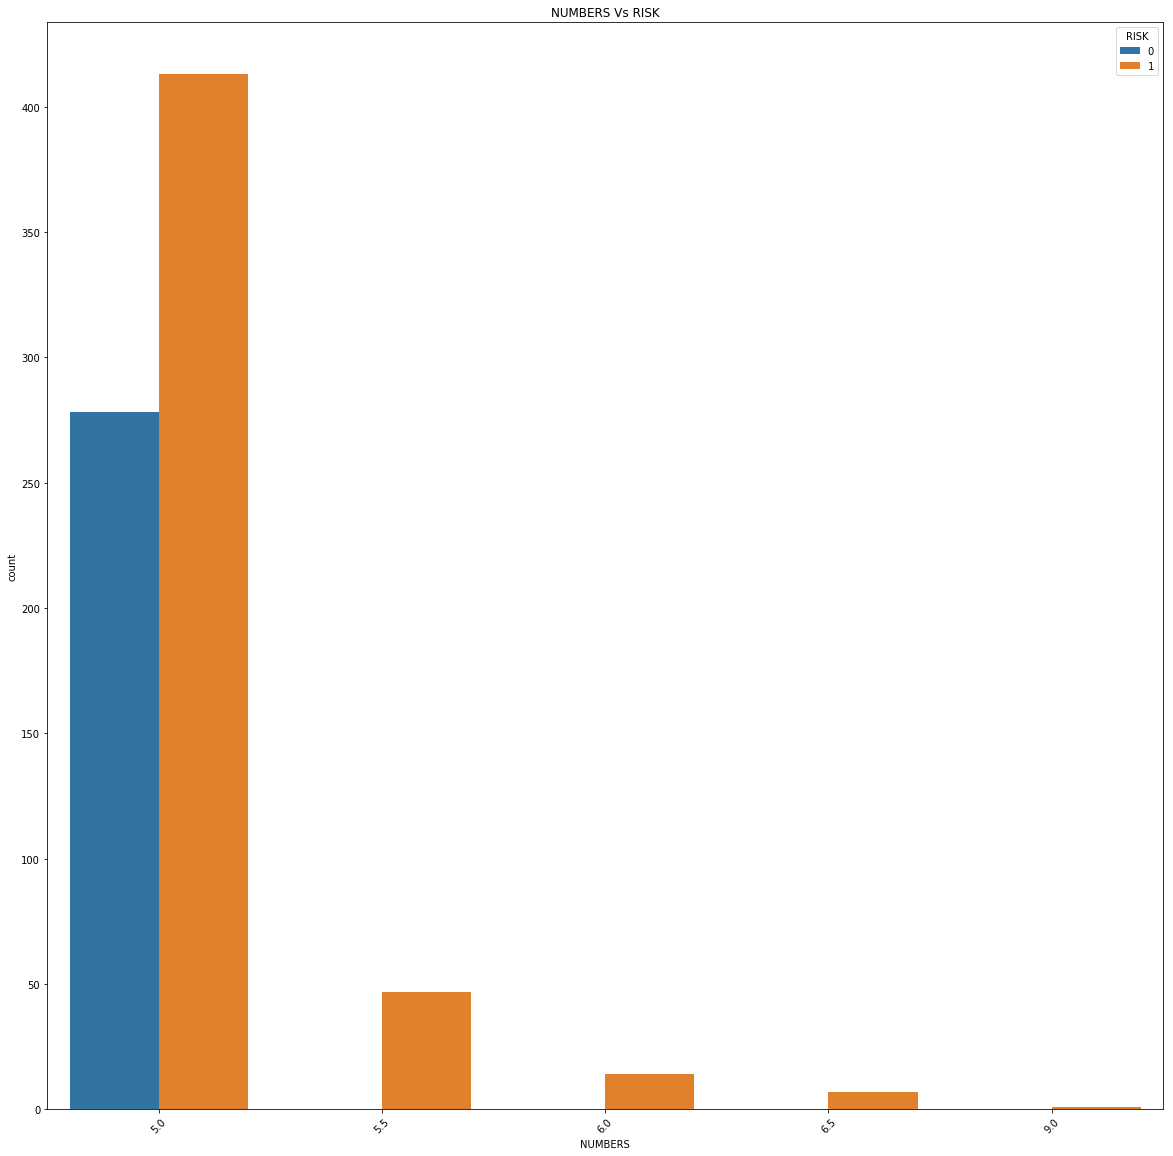

In [43]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='NUMBERS',data=final_df[['NUMBERS','RISK']],
              hue="RISK").set_title("NUMBERS Vs RISK")
plt.xticks(rotation=45)

### Plot for Risk percentage
It is observed that the value_counts for risk=0 and risk=1 are in the same degree. So it can be said that there is no class imbalance problem. 

### Scatter plot the correlation between Audit_Risk and Inherent_Risk for risk=1 and risk=0

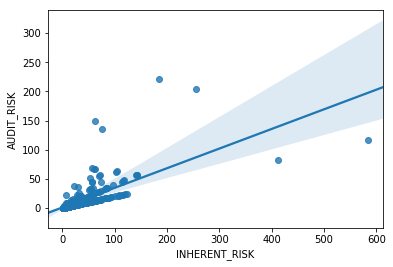

In [44]:
plot1 = sns.regplot("INHERENT_RISK","AUDIT_RISK",data=final_df[final_df["RISK"]==1],scatter=True)

Here it is observed from the above plot that there is good linear-correlation between INHERENT_RISK and AUDIT_RISK when RISK=1


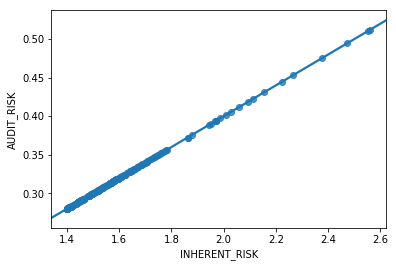

In [45]:
plot2 = sns.regplot("INHERENT_RISK","AUDIT_RISK",data=final_df[final_df["RISK"]==0],scatter=True)

Here it is observed that the linear correlation between INHERENT_RISK and AUDIT_RISK when RISK=0 is not so good.

From the above plots it is can be concluded that, INHERENT_RISK above 3.5 the risk is high which is 1.
The distribution is also different for risk=0 and risk=1.


## Scaling the features and splitting the data into X and y.

The data is splitted into to_scale_x_df and y_final_reg which is the target.
The features scaling is performed using MinMaxScaler and StandardScaler as well. 

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

final_df1 = final_df.copy()
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

y_final_reg = final_df['AUDIT_RISK']# Regression y

y_final_clf = final_df['RISK'] # Classification y
to_scale_x_df = final_df1.drop(["AUDIT_RISK","RISK"], axis =1)

minmax_x_df = to_scale_x_df.copy()
standard_x_df = to_scale_x_df.copy()

num_cols = ['SECTOR_SCORE', 'LOCATION_ID','PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY','RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
        'MARKS', 'LOSS','PROB', 'LOSS_SCORE', 'HISTORY_SCORE']
num_cols = [x.upper() for x in num_cols]

minmax_x_df[num_cols] = minmax_scaler.fit_transform(minmax_x_df[num_cols])       # MinMax scaled X
standard_x_df[num_cols] = standard_scaler.fit_transform(standard_x_df[num_cols])    # Std scaled X
X=minmax_x_df[num_cols]
y=y_final_reg

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [47]:
X.columns
X.shape


(760, 28)

## Correlation Matrix

In [48]:
# Correlation matrix - linear relation among independent attributes and with the Target attribute



rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = final_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,RISK_C,MONEY_VALUE,SCORE_MV,RISK_D,DISTRICT_LOSS,PROB1,RISK_E,HISTORY,PROB,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
SECTOR_SCORE,1,-0.22,-0.42,-0.22,-0.25,-0.21,-0.24,-0.27,-0.15,-0.17,-0.16,-0.12,-0.31,-0.12,-0.11,-0.086,-0.13,-0.11,-0.13,-0.099,-0.33,-0.21,-0.15,-0.14,-0.17,-0.082,-0.086,-0.13,-0.36
PARA_A,-0.22,1,0.51,1,0.3,0.36,0.3,0.49,0.14,0.15,0.15,0.4,0.27,0.4,0.14,0.048,0.13,0.13,0.19,0.11,0.43,0.52,0.16,0.41,0.15,0.05,0.048,0.19,0.3
SCORE_A,-0.42,0.51,1,0.52,0.46,0.56,0.46,0.53,0.24,0.27,0.26,0.21,0.47,0.21,0.084,0.093,0.099,0.17,0.26,0.14,0.72,0.38,0.17,0.33,0.27,0.093,0.093,0.26,0.67
RISK_A,-0.22,1,0.52,1,0.3,0.36,0.3,0.5,0.15,0.15,0.15,0.4,0.28,0.39,0.14,0.048,0.13,0.13,0.19,0.11,0.44,0.52,0.17,0.41,0.15,0.05,0.048,0.19,0.29
PARA_B,-0.25,0.3,0.46,0.3,1,0.68,1,0.98,0.37,0.38,0.38,0.19,0.58,0.19,-0.019,0.11,0.01,0.21,0.32,0.18,0.7,0.54,0.13,0.42,0.38,0.12,0.11,0.32,0.31
SCORE_B,-0.21,0.36,0.56,0.36,0.68,1,0.68,0.7,0.28,0.31,0.3,0.2,0.56,0.19,-0.011,0.093,0.01,0.2,0.3,0.16,0.9,0.43,0.12,0.32,0.31,0.099,0.093,0.3,0.51
RISK_B,-0.24,0.3,0.46,0.3,1,0.68,1,0.98,0.37,0.38,0.38,0.19,0.57,0.19,-0.019,0.11,0.011,0.21,0.32,0.18,0.7,0.54,0.13,0.42,0.38,0.12,0.11,0.32,0.31
TOTAL,-0.27,0.49,0.53,0.5,0.98,0.7,0.98,1,0.36,0.37,0.37,0.25,0.58,0.25,0.011,0.11,0.036,0.22,0.33,0.18,0.73,0.6,0.15,0.46,0.37,0.12,0.11,0.33,0.35
NUMBERS,-0.15,0.14,0.24,0.15,0.37,0.28,0.37,0.36,1,0.91,0.96,0.26,0.45,0.26,0.12,0.035,0.13,0.2,0.2,0.2,0.5,0.37,0.22,0.39,0.91,-0.002,0.035,0.2,0.2
SCORE_B.1,-0.17,0.15,0.27,0.15,0.38,0.31,0.38,0.37,0.91,1,0.99,0.31,0.51,0.31,0.14,0.037,0.15,0.22,0.24,0.21,0.56,0.42,0.25,0.44,1,0.0043,0.037,0.24,0.23


## Regression Models

The data scaling and cleaning is done. Applying the regression models for the data.

In [49]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 427   size of validation set: 143   size of test set: 190



In [50]:
f = open('GROUP3.csv', 'w')
line = 'MODEL_NAME, TRAIN_SCORE, TEST_SCORE, MAE/BEST PARAMS, MSE,RMSE,\n'
f.write(line)
f.close()

## LINEAR REGRESSION

The below model represents the linear regression ;the target variable is audit_risk for this regression.The data is divided into training,validation and testing which helps in overcoming the overfitting problem. 
The model provides a training (training and validation) and test scores of 0.8344 & 0.8354 which shows the similar output on both the sets with a least difference which explains a good model. The root mean square (rmse) which defines the percentage of error present in the data. 
The mse & rmse of the  below 1 for the linear regression model.

Size of training set: 427   size of validation set: 143   size of test set: 190

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train score: 0.8030
Test score: 0.6331
Coefficients: 
 [   2.57010502   -1.47819932  -85.58347207    2.77997734   57.84685091
   34.12570454   -0.68365629  -32.17015855  -15.83474767   -3.81782121
  -34.70179901  119.33191822 -280.27517157    1.27889015  150.26232049
   14.46719141    4.22378861  -81.86462387 -351.20353193  215.9463838
   -3.84887546  301.14537963  185.62615274  -34.70179901    4.22378861
   17.91371568    4.22378861   17.91371568]
mae: 4.055975116968111
mse: 156.47188785613574
rmse: 12.508872365490653


,Coeffecient
SECTOR_SCORE,2.570105
LOCATION_ID,-1.478199
PARA_A,-85.583472
SCORE_A,2.779977
RISK_A,57.846851
PARA_B,34.125705
SCORE_B,-0.683656
RISK_B,-32.170159
TOTAL,-15.834748
NUMBERS,-3.817821


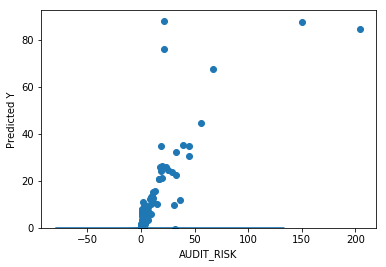

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))



from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_trainval, y_trainval)
print(lreg)
print('Train score: %.4f'%lreg.score(X_trainval, y_trainval))
print('Test score: %.4f'%lreg.score(X_test, y_test))

# The coefficients
print('Coefficients: \n', lreg.coef_)
predictions = lreg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# calculate these metrics by hand!
from sklearn import metrics

print('mae:', metrics.mean_absolute_error(y_test, predictions))
print('mse:', metrics.mean_squared_error(y_test, predictions))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
sns.distplot((y_test-predictions), bins=500)
coeffecients = pd.DataFrame(lreg.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

In [52]:
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

line = 'LinearRegression' + ',' +str(lreg.score(X_trainval,y_trainval))+','+str(lreg.score(X_test, y_test))+','+str(metrics.mean_absolute_error(y_test, predictions))+','+str(mse)+','+str(rmse) +'\n'
f = open('GROUP3.csv','a')
f.write(line)
f.close()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


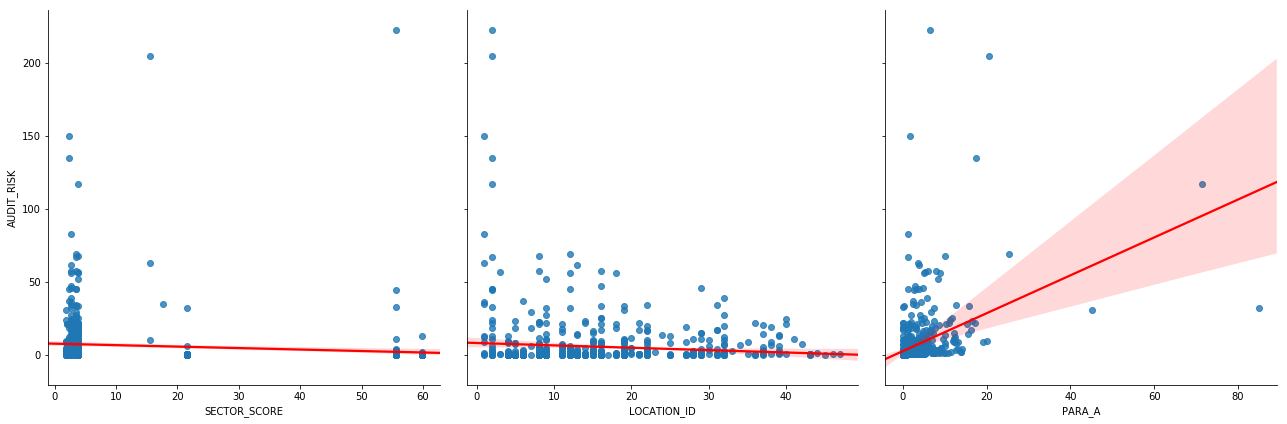

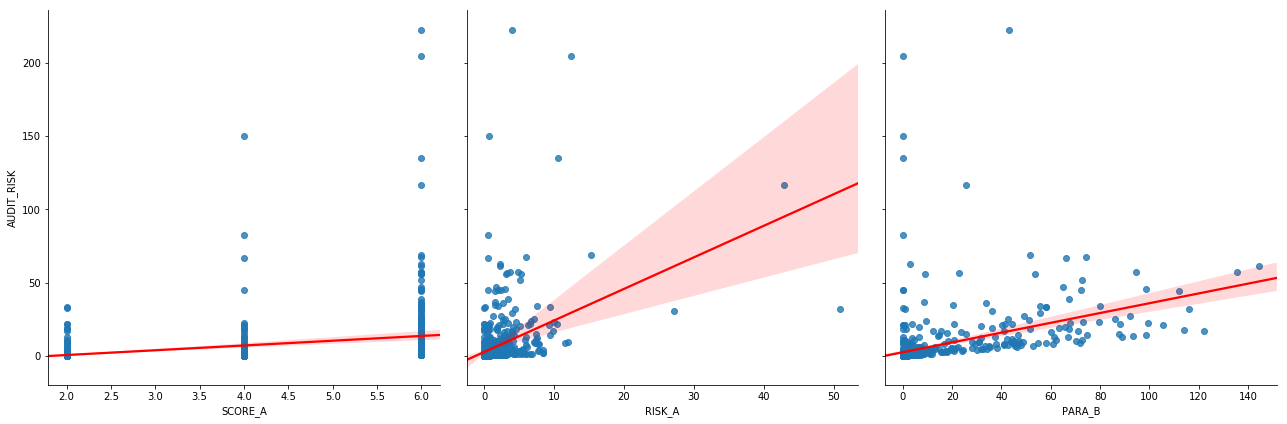

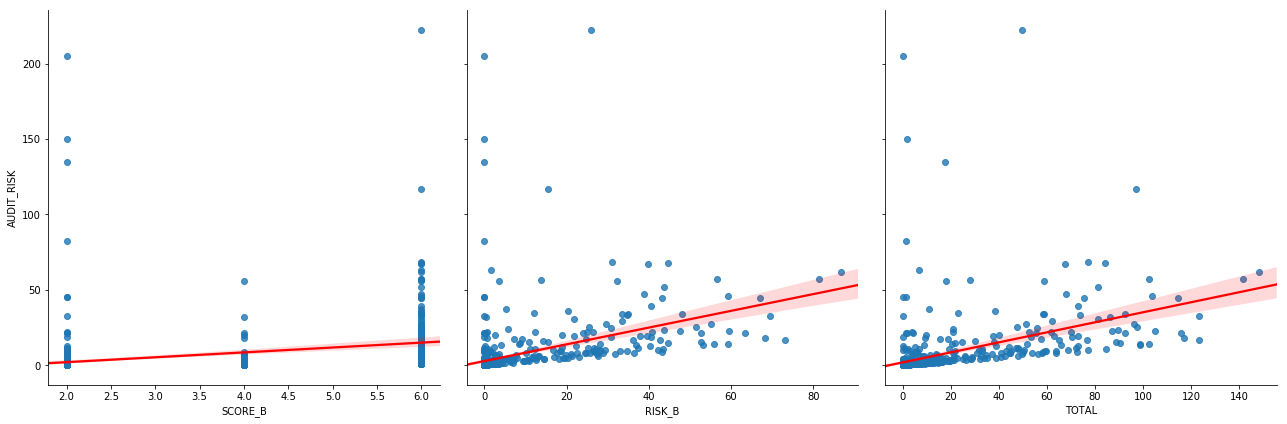

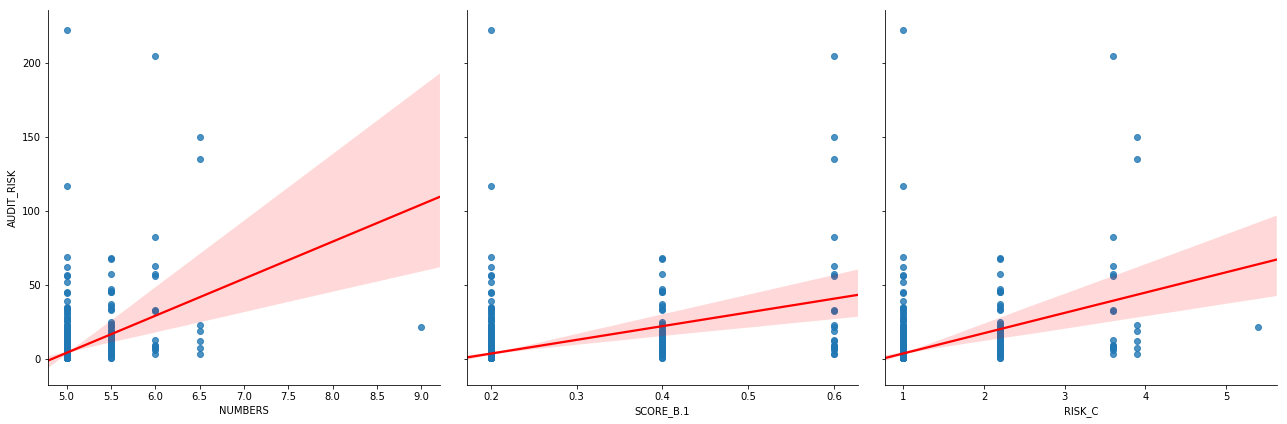

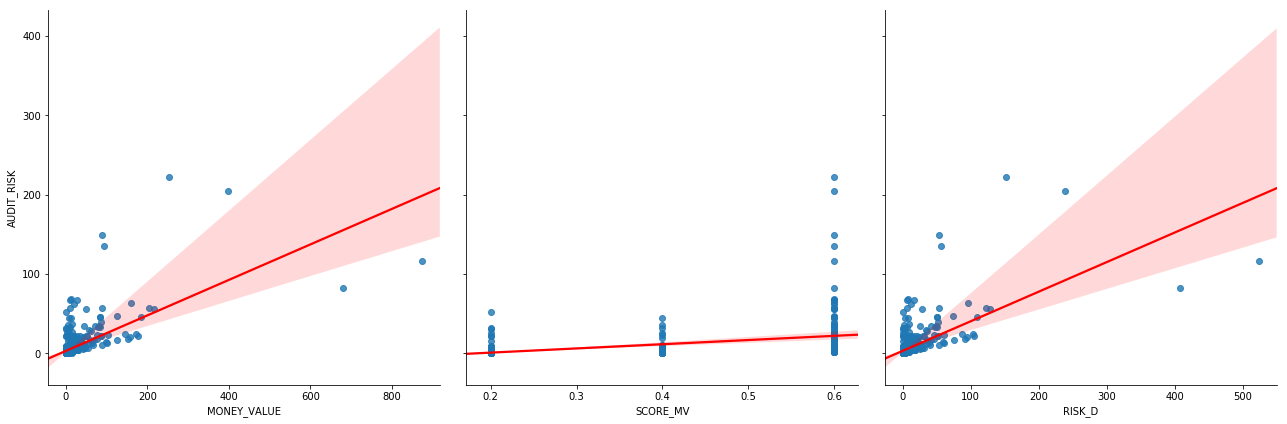

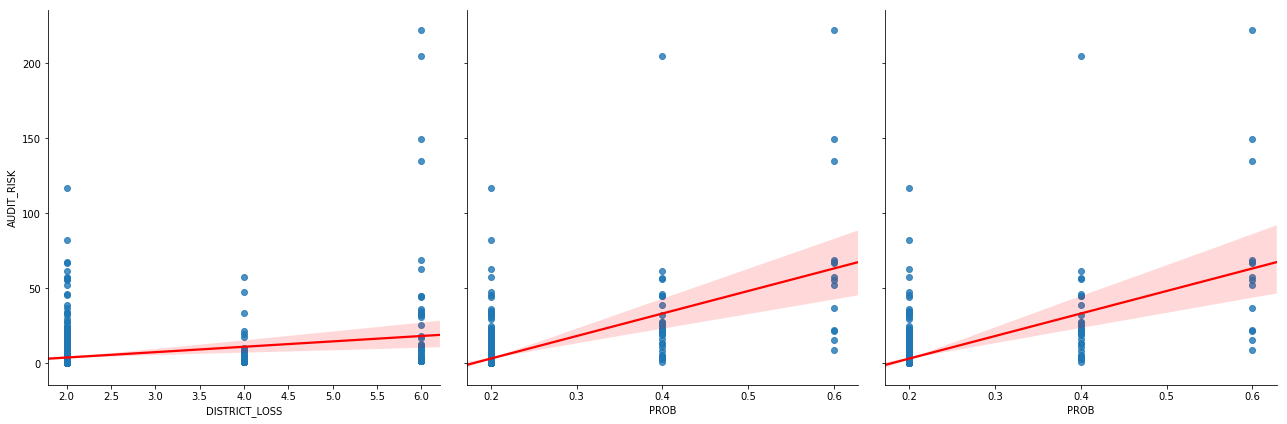

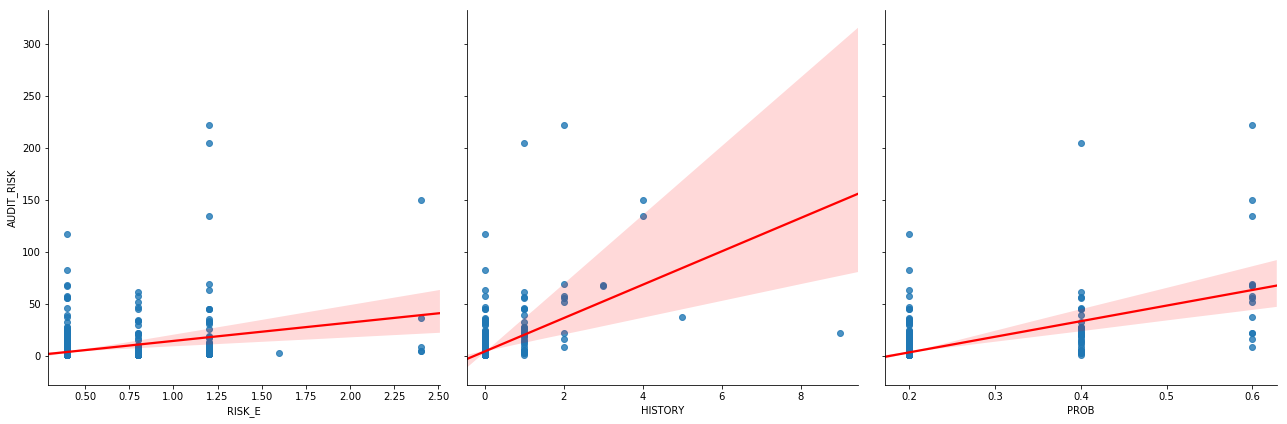

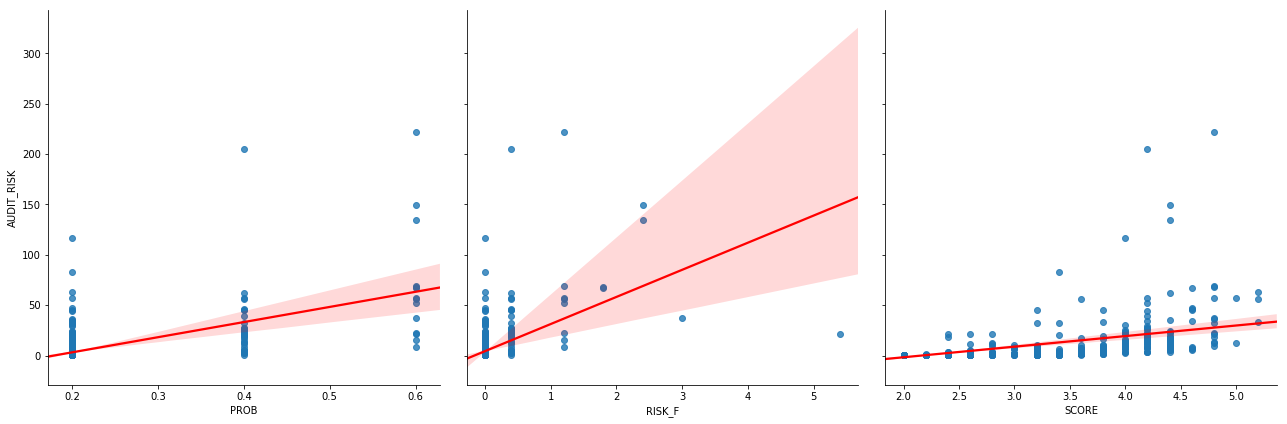

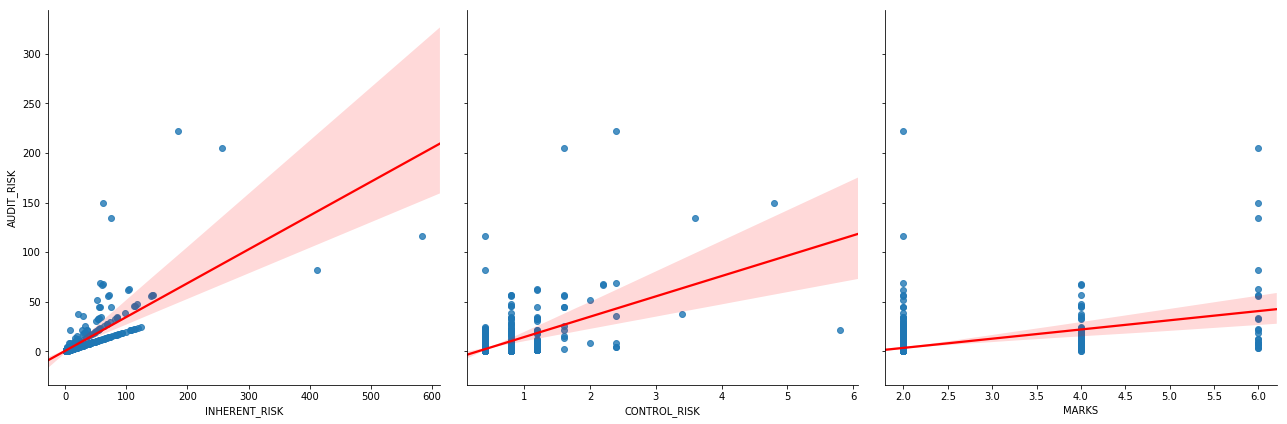

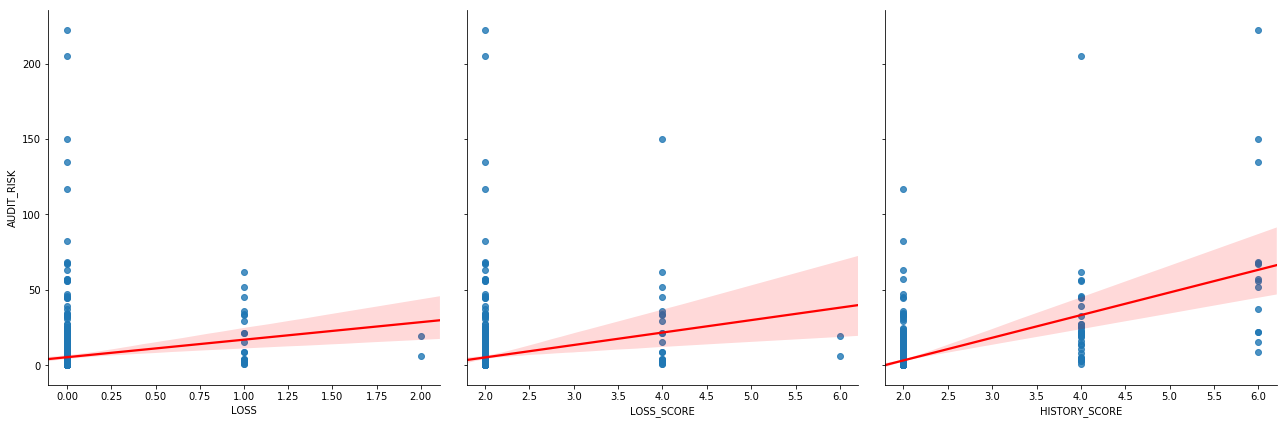

In [53]:
# Regression Relationship
final_df[['LOCATION_ID','RISK']] = final_df[['LOCATION_ID','RISK']].astype('int')

        
sns.pairplot(final_df, x_vars=['SECTOR_SCORE','LOCATION_ID','PARA_A'], y_vars=["AUDIT_RISK"],
             height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['SCORE_A', 'RISK_A', 'PARA_B'], y_vars=["AUDIT_RISK"],
           height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['SCORE_B', 'RISK_B', 'TOTAL'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['NUMBERS', 'SCORE_B.1', 'RISK_C'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6,plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['MONEY_VALUE', 'SCORE_MV', 'RISK_D'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['DISTRICT_LOSS', 'PROB', 'PROB'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['RISK_E', 'HISTORY', 'PROB'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['PROB', 'RISK_F', 'SCORE'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['INHERENT_RISK','CONTROL_RISK', 'MARKS'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['LOSS', 'LOSS_SCORE', 'HISTORY_SCORE'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

## K-NN 

The K-Nearest Neighbors regression is performed on the data. GridSearch CrossValidation is used to find the number of nearest neighbors. The following model provides with the best parameter as 3 for the n_neighbors.The train and test scores for the following models are : 



Text(0, 0.5, 'MSE')

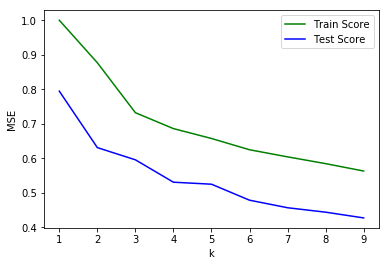

In [54]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_trainval, y_trainval)
    train_score_array.append(knn_reg.score(X_trainval, y_trainval))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [55]:
# split data into train+validation set and test set
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0


Size of training set: 427   size of validation set: 143   size of test set: 190



In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])
k_range = [1,3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.60


In [57]:

%matplotlib inline
train_score_array = []
test_score_array = []

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_trainval, y_trainval)
train_score_array.append(knn_reg.score(X_trainval, y_trainval))
test_score_array.append(knn_reg.score(X_test, y_test))
print(train_score_array)
print(test_score_array)

[0.7320188632433133]
[0.5954756658410673]


In [58]:
from sklearn import metrics
knn_tr_pred = knn_reg.predict(X_trainval)
knn_test_pred = knn_reg.predict(X_test)
knn_tr_mse = metrics.mean_squared_error(y_trainval, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('train mse: ', knn_tr_mse)
print('train rmse: ', knn_tr_rmse)

print('test mse: ', knn_test_mse)
print('test rmse: ', knn_test_rmse)

print('train score: ', knn_reg.score(X_trainval, y_trainval))
print('test score: ', knn_reg.score(X_test, y_test) )



train mse:  65.28854587387022
train rmse:  8.080132788133511
test mse:  172.51954320447484
test rmse:  13.134669512571485
train score:  0.7320188632433133
test score:  0.5954756658410673


In [59]:

mse = knn_test_mse
rmse = knn_test_rmse
line = 'K-NN' + ',' +str(knn_reg.score(X_trainval, y_trainval))+','+str(knn_reg.score(X_test, y_test))+ ','+str('n_neighbors=3')+','+str(mse)+','+str(rmse) +'\n'
f = open('GROUP3.csv','a')  
f.write(line)
f.close()

## RIDGE 
Ridge Regression:
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
It takes ‘alpha’ as a parameter on initialization.High alpha values can lead to significant underfitting.After Performing the GridSearch Cross Validation the paramter of alpha :0.001 is declared 

In [60]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_trainval,y_trainval)
    train_score_list.append(ridge.score(X_trainval,y_trainval))
    test_score_list.append(ridge.score(X_test, y_test))

In [61]:
print(train_score_list)
print(test_score_list)

[0.7984427590920408, 0.7873175953334678, 0.7681583365548954, 0.6625976155052724, 0.428394633660913]
[0.6128672374695667, 0.637007979561594, 0.6938109046903516, 0.5920733825556953, 0.3454696613896825]


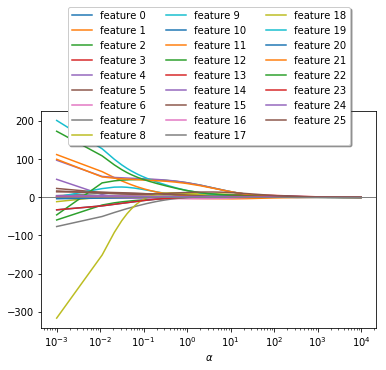

In [62]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_trainval,y_trainval)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,26):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [63]:
from sklearn.linear_model import Ridge
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    
        ridge =Ridge()
        scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            

ridge = Ridge(**best_parameters)
ridge.fit(X_trainval, y_trainval)
test_score = ridge.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.75
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.63


In [64]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_trainval,y_trainval)
print('Train score: {:.4f}'.format(ridge.score(X_trainval,y_trainval)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8026
Test score: 0.6293


In [65]:
from sklearn import  metrics
ridge_tr_pred = ridge.predict(X_trainval)
ridge_test_pred =ridge.predict(X_test)
ridge_tr_mse = metrics.mean_squared_error(y_trainval,ridge_tr_pred)
ridge_tr_rmse = np.sqrt(ridge_tr_mse)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print('train mse: ', ridge_tr_mse)
print('train rmse: ', ridge_tr_rmse)

print('test mse: ', ridge_test_mse)
print('test rmse: ', ridge_test_rmse)


train mse:  48.08488634142183
train rmse:  6.934326668208084
test mse:  158.09609755402082
test rmse:  12.573627064376485


In [66]:
mse = ridge_test_mse
rmse = ridge_test_rmse
f = open('outputs.csv', 'a')
line = 'Ridge' + ',' +str(format(ridge.score(X_trainval,y_trainval))) + ',' + str(format(ridge.score(X_test, y_test))) +','+str('alpha = 0.01')+','+str(ridge_test_mse)+','+str(ridge_test_rmse)+ '\n'
f.write(line)
f.close()

## LASSO

In [67]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_trainval,y_trainval)
    train_score_list.append(lasso.score(X_trainval,y_trainval))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

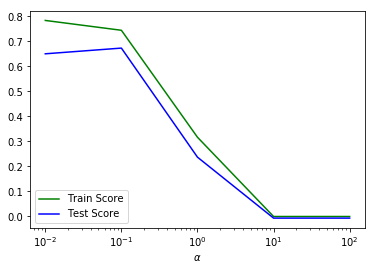

In [68]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

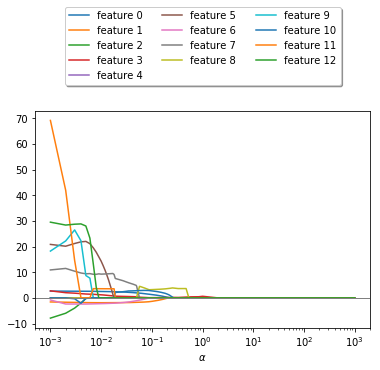

In [69]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_trainval,y_trainval)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [70]:
from sklearn.linear_model import Lasso
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:   
        lasso =Lasso()
        # perform cross-validation
        scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
lasso = Lasso(**best_parameters)
lasso.fit(X_trainval, y_trainval)
test_score = lasso.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on validation set: 0.75
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.63


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [71]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_trainval,y_trainval)
print('Train score: {:.4f}'.format(lasso.score(X_trainval,y_trainval)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.8015
Test score: 0.6292


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [72]:
from sklearn.linear_model import Lasso

train_score_list = []
test_score_list = []


lasso = Lasso(alpha=0.001)
lasso.fit(X,y)

test_score_list.append(lasso.score(X, y))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [73]:

print(test_score_list)

[0.8434658872961087]


In [74]:
from sklearn import  metrics
lasso_tr_pred = lasso.predict(X_trainval)
lasso_test_pred =lasso.predict(X_test)
lasso_tr_mse = metrics.mean_squared_error(y_trainval,lasso_tr_pred)
lasso_tr_rmse = np.sqrt(lasso_tr_mse)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print('train mse: ', lasso_tr_mse)
print('train rmse: ', lasso_tr_rmse)

print('test mse: ', lasso_test_mse)
print('test rmse: ', lasso_test_rmse)

train mse:  51.66600414930981
train rmse:  7.187906798874747
test mse:  26.494392705243843
test rmse:  5.147270413067866


In [75]:
mse = lasso_test_mse
rmse = lasso_test_rmse
f = open('GROUP3.csv', 'a')
line = 'Lasso,'+','+ str(lasso.score(X_trainval,y_trainval)) + ',' + str(test_score_list) +','+str('alpha=0.001')+','+str(lasso_test_mse)+','+str(lasso_test_rmse)+ '\n'
f.write(line)
f.close()

## POLYNOMIAL

In [76]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_trainval)
    X_test_poly = poly.transform(X_test) 
    lreg.fit(X_train_poly, y_trainval)
    train_score_list.append(lreg.score(X_train_poly, y_trainval))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [77]:
print(train_score_list)
print(test_score_list)

[0.8030326957855614, 1.0]
[0.6331042554722439, 0.996899205200688]


In [78]:
poly_train_pred = lreg.predict(X_train_poly)
poly_test_pred =lreg.predict(X_test_poly)
poly_mse = metrics.mean_squared_error(y_trainval,poly_train_pred)
poly_rmse = np.sqrt(poly_mse)
poly_test_mse = metrics.mean_squared_error(y_test, poly_test_pred)
poly_test_rmse = np.sqrt(poly_test_mse)

print('train mse: ', poly_mse)
print('train rmse: ', poly_rmse)

print('test mse: ', poly_test_mse)
print('test rmse: ', poly_test_rmse)



print(train_score_list)
print(test_score_list)

train mse:  5.1252315880093105e-27
train rmse:  7.159072277892793e-14
test mse:  1.3224116750858765
test rmse:  1.1499615972222188
[0.8030326957855614, 1.0]
[0.6331042554722439, 0.996899205200688]


In [79]:
mse = poly_test_mse
rmse = poly_test_rmse
f = open('GROUP3.csv', 'a')
line = 'Poly,'+',' + str(lreg.score(X_train_poly, y_trainval)) + ',' + str(lreg.score(X_test_poly, y_test)) +','+str('degree =1')+str(poly_test_mse)+','+str(poly_test_rmse)+ '\n'
f.write(line)
f.close()

## DECISION TREE

In [80]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import os
import pandas as pd
import mglearn


DT_r = DecisionTreeRegressor()
DT_r.fit(X_trainval,y_trainval)

DT_tr_pred = DT_r.predict(X_trainval)
DT_test_pred = DT_r.predict(X_test)
lreg = LinearRegression().fit(X_trainval, y_trainval)

pred_lr = lreg.predict(X_trainval)
pred_test =lreg.predict(X_test)
##train_score_list.append(lreg.score(pred_lr, y_trainval))
##test_score_list.append(lreg.score(pred_test, y_test))
##print(train_score_list)
##print(test_score_list)


In [81]:

pred_lr 
pred_test


array([ 1.25576222e-01,  1.56941258e+00,  4.56357760e+00, -1.78529416e+00,
        3.48082031e+01,  1.66855292e+00, -1.06626302e+00,  3.42759476e+00,
        2.42584867e+01, -9.36380540e-01,  4.54751612e+00,  1.33702238e+01,
       -1.64930054e-01, -1.11685836e+00,  1.48224460e+00, -7.39329875e-01,
       -8.78003816e-01, -1.07029023e+00,  1.05956958e-01, -1.48188507e+00,
        7.42646521e-01, -4.93897181e-01,  8.46659545e+01, -1.06157976e+00,
       -2.69600076e+00,  8.44368137e-01, -3.48126396e-01,  7.39934520e+00,
       -1.46369608e-01,  7.99373443e+00,  8.80421661e+01,  1.12141233e+01,
        9.92928487e+00,  1.18423687e+00, -1.20249379e+00,  2.07481418e+01,
        1.25905965e+00,  6.29189512e+00, -1.80157970e+00,  4.49919172e-02,
        8.79344228e+00,  2.80124666e-01,  2.97341324e+00,  5.04745849e-01,
        2.53918505e+00,  5.50008428e-01, -7.69412431e-01, -3.10772009e+00,
        1.26590864e+01,  7.40373730e+00, -5.68827361e-01,  4.49335405e-01,
        6.00120787e+00,  

In [82]:
print('Train Score:',DT_r.score(X_trainval,y_trainval))      
print('Train Score:',DT_r.score(X_test, y_test))

Train Score: 0.9999999999552395
Train Score: 0.7337466976787583


In [83]:
from sklearn import  metrics
pred_lr = lreg.predict(X_trainval)
pred_test =lreg.predict(X_test)
pred_lr_mse = metrics.mean_squared_error(y_trainval,pred_lr)
pred_lr_rmse = np.sqrt(pred_lr_mse)
pred_test_mse = metrics.mean_squared_error(y_test, pred_test)
pred_test_rmse = np.sqrt(pred_test_mse)

print('train mse: ', pred_lr_mse)
print('train rmse: ', pred_lr_rmse)

print('test mse: ', pred_test_mse)
print('test rmse: ', pred_test_rmse)

train mse:  47.98736594857009
train rmse:  6.9272913861458205
test mse:  156.47188785613574
test rmse:  12.508872365490653


In [84]:
mse = pred_test_mse
rmse = pred_test_rmse

line = 'Decision Tree ' + ',' +str(DT_r.score(X_trainval,y_trainval)) +','+str(DT_r.score(X_test, y_test))+','+str('-')+ ','+str(mse)+','+str(rmse) +','+str('best Cross Valid Score =0.79') +'\n'
f = open('GROUP3.csv', 'a')
f.write(line)
f.close()



## SVM 

In [85]:
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Best parameters: {'C': 100}
Best cross-validation score: 0.79


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

In [86]:
# SVM Linear


from sklearn import svm
svm_r = svm.SVR(kernel='linear', C = 100)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))





svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))

Train Score: 0.6907917684951009
Train Score: 0.5668714753016784
train mse:  75.33274935509861
train rmse:  8.679444069472343
test mse:  184.71851733009643
test rmse:  13.591119060993337
Train Score: 0.6907917684951009
Train Score: 0.5668714753016784


In [87]:
mse = svm_test_mse
rmse = svm_test_rmse
f = open('GROUP3.csv', 'a')
line = 'SVM LINEAR' + ',' +str(svm_r.score(X_trainval,y_trainval)) + ',' + str(svm_r.score(X_test, y_test))+','+str('C = 100')+','+str(svm_test_mse)+','+str(svm_test_rmse)+','+str('best Cross Valid Score =0.79') +'\n'
f.write(line)
f.close()

In [88]:
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.85


In [89]:
# SVM RBF

svm_r = svm.SVR(kernel='rbf', C = 100,gamma=0.1)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)

svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))

train mse:  48.06329513841175
train rmse:  6.932769658542807
test mse:  133.7535401740251
test rmse:  11.565186560277576
Train Score: 0.8027210394247949
Train Score: 0.6863743041785764


In [90]:
mse = svm_test_mse
rmse = svm_test_rmse


In [91]:
f = open('GROUP3.csv', 'a')
line = 'SVM RBF' + ',' + str(svm_r.score(X_trainval,y_trainval)) + ',' + str(svm_r.score(X_test, y_test))+','+str('C = 100,gamma=0.1')+','+str(svm_test_mse)+','+str(svm_test_rmse)+','+str('best Cross Valid Score =0.79') +'\n'
f.write(line)
f.close()

In [92]:
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'degree': [1,2,3]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Best parameters: {'C': 100, 'degree': 1}
Best cross-validation score: 0.79


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [93]:


svm_r = svm.SVR(kernel='poly', C = 100, degree=1)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)

svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)

Train Score: 0.579835507285468
Train Score: 0.451426525033158
train mse:  102.36514811888021
train rmse:  10.117566314034232
test mse:  233.95291042785132
test rmse:  15.295519292519993


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [94]:
mse = svm_test_mse
rmse = svm_test_rmse
f = open('GROUP3.csv', 'a')
line = 'SVM POLY' + ',' + str(svm_r.score(X_trainval,y_trainval)) + ',' + str(svm_r.score(X_test, y_test))+','+str('C = 100, degree=1')+','+str(svm_test_mse)+','+str(svm_test_rmse)+','+str('best Cross Valid Score =0.79') +'\n'
f.write(line)
f.close()

## RANDOM FOREST

In [95]:
from sklearn.ensemble import RandomForestRegressor

estimator = [20,50,70]
max_features_val= [10,15,20]

param_grid = dict(n_estimators=estimator, max_features=max_features_val)
print(param_grid)

{'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]}


In [96]:
randomforest = RandomForestRegressor()

rfgs = GridSearchCV(randomforest, param_grid = param_grid, cv=10, scoring='r2')
rfgs.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [97]:
rfgs.best_score_

0.8920373517217515

In [98]:
rfgs.best_params_

{'max_features': 20, 'n_estimators': 50}

In [99]:
randomforest_best = RandomForestRegressor(n_estimators= 20,max_features= 20 )

In [100]:
randomforest_best.fit(X_trainval,y_trainval)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [101]:
features = randomforest_best.feature_importances_

In [102]:
cols = X_trainval.columns

In [103]:
feature_columns = pd.DataFrame(data=[cols,features])

In [104]:
feature_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,HISTORY,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,MARKS,LOSS,PROB,LOSS_SCORE,HISTORY_SCORE
1,0.0151815,0.00556916,0.013528,2.01905e-05,0.0154366,0.00987687,5.45389e-05,0.00713437,0.0129186,0.00254287,...,0.00233944,0.0294594,0.0307539,0.45778,0.0795582,0.000760853,4.73311e-05,0.00390239,0.000122844,0.0342827


In [105]:
print("train score for Random Forest Reg:",randomforest_best.score(X_trainval,y_trainval))
print("test score for Random Forest Reg:",randomforest_best.score(X_test,y_test))

train score for Random Forest Reg: 0.9595706096057988
test score for Random Forest Reg: 0.8221187934660301


Text(0.5, 0, 'Relative Importance')

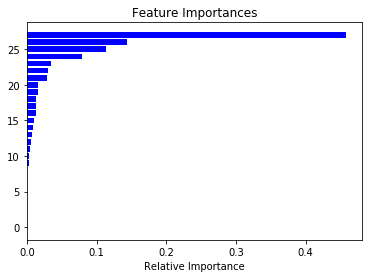

In [106]:
features=feature_columns
importances = randomforest_best.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(feat_cols[name_cols])
plt.xlabel('Relative Importance')

In [107]:
f = open('GROUP3.csv','a') 
line = 'Random Forest Reg'+',' + str(randomforest_best.score(X_trainval,y_trainval)) + ',' + str(randomforest_best.score(X_test,y_test))+','+str('n_estimators= 20,max_features= 20')+'\n'
f.write(line)
f.close()

### FROM THE OUTPUT FROM ALL THE REGRESSION IT IS OBSERVED THAT POLYNOMIAL REGRESSION IS BEST FIT AS THE MEAN SQUARE ERROR IS LESS WHEN APPLIED POLYNOMIAL REGRESSION AND THE TRAIN SCORE AND TEST CORES ARE OPTIMAL THOUGH IT CAUSES SOME OVERFITTING IT SHOWCASES AS THE BEST MODEL IN REGRESSION AGAINST OTHER MODEL. 

### RANDOM FOREST REGRESSION IS APLLIED TO DERIVE THE BEST FEATURE THE feature_columns SHOWCASES THE FEATURES WITH MORE IMPORTANCES AND BAR GRAPH IS PLOTTED TO DEPICT THEM.

## CLASSIFICATION

In [108]:
L= ['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'NUMBERS', 'MONEY_VALUE', 'HISTORY','SCORE', 'RISK']

In [109]:
audit_risk = audit_risk_df.merge(trial_df, on=L)

In [110]:
audit_risk['RISK'].unique()

array([1, 0])

In [111]:
audit_risk = audit_risk.drop(["MONEY_MARKS","DISTRICT"], axis=1)

In [112]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 30 columns):
SECTOR_SCORE     629 non-null float64
LOCATION_ID      629 non-null object
PARA_A           629 non-null float64
SCORE_A          629 non-null float64
RISK_A           629 non-null float64
PARA_B           629 non-null float64
SCORE_B          629 non-null float64
RISK_B           629 non-null float64
TOTAL            629 non-null float64
NUMBERS          629 non-null float64
SCORE_B.1        629 non-null float64
RISK_C           629 non-null float64
MONEY_VALUE      628 non-null float64
SCORE_MV         629 non-null float64
RISK_D           629 non-null float64
DISTRICT_LOSS    629 non-null int64
PROB1            629 non-null float64
RISK_E           629 non-null float64
HISTORY          629 non-null int64
PROB             629 non-null float64
RISK_F           629 non-null float64
SCORE            629 non-null float64
INHERENT_RISK    629 non-null float64
CONTROL_RISK     629 non-n

In [113]:
audit_risk['MONEY_VALUE'] = audit_risk["MONEY_VALUE"].fillna(audit_risk["MONEY_VALUE"].mean())
# merged_data_sans_dup = merged_data_sans_dup["Money_Value"].fillna(merged_data_sans_dup["Money_Value"].median())

audit_risk.isnull().sum()

SECTOR_SCORE     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
RISK_A           0
PARA_B           0
SCORE_B          0
RISK_B           0
TOTAL            0
NUMBERS          0
SCORE_B.1        0
RISK_C           0
MONEY_VALUE      0
SCORE_MV         0
RISK_D           0
DISTRICT_LOSS    0
PROB1            0
RISK_E           0
HISTORY          0
PROB             0
RISK_F           0
SCORE            0
INHERENT_RISK    0
CONTROL_RISK     0
AUDIT_RISK       0
RISK             0
MARKS            0
LOSS             0
LOSS_SCORE       0
HISTORY_SCORE    0
dtype: int64

In [114]:
audit_risk.isna().any()

SECTOR_SCORE     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
RISK_A           False
PARA_B           False
SCORE_B          False
RISK_B           False
TOTAL            False
NUMBERS          False
SCORE_B.1        False
RISK_C           False
MONEY_VALUE      False
SCORE_MV         False
RISK_D           False
DISTRICT_LOSS    False
PROB1            False
RISK_E           False
HISTORY          False
PROB             False
RISK_F           False
SCORE            False
INHERENT_RISK    False
CONTROL_RISK     False
AUDIT_RISK       False
RISK             False
MARKS            False
LOSS             False
LOSS_SCORE       False
HISTORY_SCORE    False
dtype: bool

In [115]:
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("LOHARU", 45)
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("NUH", 46)
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("SAFIDON", 47)

In [116]:
sans_out = audit_risk[audit_risk.PARA_B != 1264.630000]
audit_risk.shape

(629, 30)

In [117]:
sans_out[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,628.000000,628.000000
mean,17.235104,10.114415
std,73.623456,44.213178
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.140000,0.027000
75%,9.107500,3.585000
max,935.030000,561.018000


In [118]:
sans_out[(sans_out['INHERENT_RISK'] == 622.838000) | (sans_out['TOTAL'] == 191.360000) | (sans_out['MONEY_VALUE'] == 935.030000) |(sans_out['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,RISK,MARKS,LOSS,LOSS_SCORE,HISTORY_SCORE
34,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.0,4.0,577.508,0.4,115.5016,1,2,0,2,2
288,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.0,4.0,622.838,0.4,124.5676,1,2,0,2,2


In [119]:
final_df = sans_out[(sans_out['INHERENT_RISK'] != 622.838000) & (sans_out['TOTAL'] != 191.360000) & (sans_out['MONEY_VALUE'] != 935.030000) & (sans_out['RISK_D'] != 561.018000)]

In [120]:
final_df.shape
final_df.isnull().any()

SECTOR_SCORE     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
RISK_A           False
PARA_B           False
SCORE_B          False
RISK_B           False
TOTAL            False
NUMBERS          False
SCORE_B.1        False
RISK_C           False
MONEY_VALUE      False
SCORE_MV         False
RISK_D           False
DISTRICT_LOSS    False
PROB1            False
RISK_E           False
HISTORY          False
PROB             False
RISK_F           False
SCORE            False
INHERENT_RISK    False
CONTROL_RISK     False
AUDIT_RISK       False
RISK             False
MARKS            False
LOSS             False
LOSS_SCORE       False
HISTORY_SCORE    False
dtype: bool

In [121]:
final_df['RISK'].unique()
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'RISK', 'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE'],
      dtype='object')

In [122]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Audit_risk = final_df.copy()
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

y_final_reg = final_df['AUDIT_RISK']# Regression y

y_final_clf = final_df['RISK'] # Classification y
to_scale_x_df = Audit_risk.drop(["AUDIT_RISK","RISK"], axis =1)

mm_x_df = to_scale_x_df.copy()
std_x_df = to_scale_x_df.copy()

num_cols = ['SECTOR_SCORE', 'LOCATION_ID','PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
        'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE']
num_cols = [x.upper() for x in num_cols]

mm_x_df[num_cols] = mm_scaler.fit_transform(mm_x_df[num_cols])       # MinMax scaled X
std_x_df[num_cols] = std_scaler.fit_transform(std_x_df[num_cols])    # Std scaled X
X=mm_x_df[num_cols]
y=y_final_clf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [123]:
X.columns
X.shape


(626, 28)

## K-NN CLASSIFICATION

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 351   size of validation set: 118   size of test set: 157



## KNN classification

In [125]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_trainval, y_trainval)
    train_score_array.append(knn.score(X_trainval, y_trainval))
    test_score_array.append(knn.score(X_test, y_test))

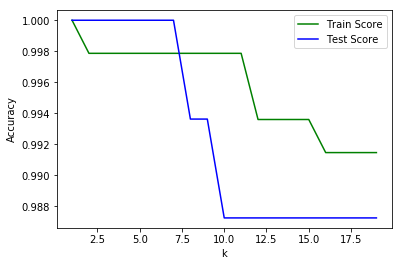

In [126]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

The below model depicts the knn classification. The procedures GridSearchCV is used in the model to derive the best parameters i.e., n_neighbors and weights.
The best parameter for the KNN classifaction is n_neighbors=1 and which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications.

In [127]:
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier()


#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])
k_range = [1,3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 1.00


In [128]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []


knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
train_score_array.append(knn.score(X_trainval, y_trainval))
test_score_array.append(knn.score(X_test, y_test))

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

In [130]:
knn_c_bst_clf = KNeighborsClassifier(n_neighbors=1)

knn_c_bst_clf.fit(X_trainval,y_trainval)

knnc_tr_pred = knn_c_bst_clf.predict(X_trainval)
knnc_test_pred = knn_c_bst_clf.predict(X_test)
print(knnc_tr_pred[4])

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, knnc_tr_pred))
print("f1 score: ", f1_score(y_trainval, knnc_tr_pred))
print("recall score: ", recall_score(y_trainval, knnc_tr_pred))
print("precision: ", precision_score(y_trainval, knnc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, knnc_test_pred))
print("f1 score: ", f1_score(y_test, knnc_test_pred))
print("recall score: ", recall_score(y_test, knnc_test_pred))
print("precision: ", precision_score(y_test, knnc_test_pred))

1
Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Evaluation metrics

In [131]:
pd.crosstab(y_trainval, knnc_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [132]:
pd.crosstab(y_test, knnc_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [133]:
from sklearn.metrics import classification_report
report = classification_report(y_test, knnc_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



#### Calculating the roc and plotting roc curve.

AUC: 1.000
[2. 1. 0.]


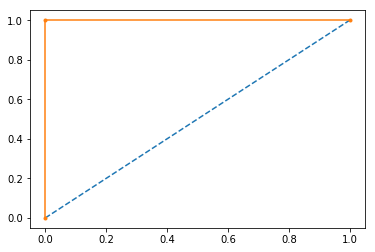

In [134]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
knn_c_bst_clf.fit(X_trainval,y_trainval)
# predict probabilities
probs = knn_c_bst_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

Here we can say that the model is the perfect skill. 

#### Precision-Recall curve

f1=1.000 auc=1.000 ap=1.000


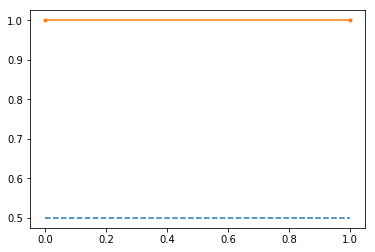

In [135]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = knn_c_bst_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = knn_c_bst_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [136]:
f = open('GROUOP3.csv','a') 
line = ' classification model \n Model, Best Params, Accuracy Score, f1 score, Recall,Precision \n'
f.write(line)
f.close()

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, knnc_test_pred)
f1score = f1_score(y_test, knnc_test_pred)
recallscore= recall_score(y_test, knnc_test_pred)
precision =  precision_score(y_test, knnc_test_pred)
# adding vals to excel file that you created.

line = 'Knn Classification' + ',' +str("n_neighbors=1")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('outputs.csv','a')
f.write(line)
f.close()

## LOGISTIC REGRESSION

The below model depicts the logistic regression. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C and penalty. The best parameter for the logistic regression is C=1 and penalty = l1 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications.

In [138]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_trainval, y_trainval)
    log_l2.fit(X_trainval, y_trainval)
    train_score_l1.append(log_l1.score(X_trainval, y_trainval))
    train_score_l2.append(log_l2.score(X_trainval, y_trainval))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

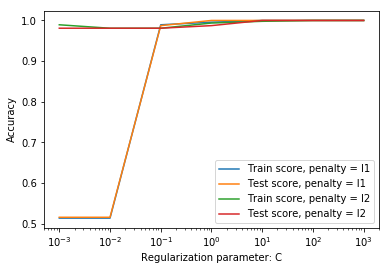

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [140]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty_mod = ['l1','l2']

log_reg = LogisticRegression()

#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(penalty=penalty_mod,C=c_range)
print(param_grid)

#instantiation of the grid
log_reg_grid = GridSearchCV(log_reg,param_grid, cv=10, scoring='accuracy')

# fitting the grid
log_reg_grid.fit(X, y)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [141]:
log_reg_grid.best_score_

0.9984025559105432

In [142]:
log_reg_grid.best_params_

{'C': 1000, 'penalty': 'l1'}

In [143]:
scores = cross_val_score(log_reg, X, y,cv=10) # input arguments followed by X and Y
print("Cross-validation scores: {}".format(scores))



Cross-validation scores: [1.         0.984375   1.         1.         1.         1.
 0.98387097 1.         1.         0.83870968]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

In [144]:
log_reg = LogisticRegression(penalty = 'l1', C = 1)
log_reg.fit(X_trainval, y_trainval)

print(log_reg.score(X_trainval, y_trainval))
print(log_reg.score(X_test, y_test))


logreg_tr_pred = log_reg.predict(X_trainval)
logreg_test_pred = log_reg.predict(X_test)

0.9957356076759062
1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Evaluation metrics

In [145]:
pd.crosstab(y_trainval, logreg_tr_pred)


col_0,0,1
RISK,,
0,241,0
1,2,226


In [146]:
print(log_reg.score(X_trainval, y_trainval))

0.9957356076759062


In [147]:
pd.crosstab(y_test, logreg_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [148]:
print(log_reg.score(X_test, y_test))

1.0


In [149]:
from sklearn.metrics import classification_report
report = classification_report(y_test, logreg_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [150]:
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score(y_trainval, logreg_tr_pred))
print("f1 score: ", f1_score(y_trainval, logreg_tr_pred))
print("recall score: ", recall_score(y_trainval, logreg_tr_pred))
print("precision: ", precision_score(y_trainval, logreg_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, logreg_test_pred))
print("f1 score: ", f1_score(y_test, logreg_test_pred))
print("recall score: ", recall_score(y_test, logreg_test_pred))
print("precision: ", precision_score(y_test, logreg_test_pred))

Accuracy score:  0.9957356076759062
f1 score:  0.9955947136563876
recall score:  0.9912280701754386
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Calculating and plotting Roc curve

AUC: 1.000
[1.99999996 0.99999996 0.9999999  0.99999726 0.99999724 0.99999717
 0.99999689 0.99999683 0.99999679 0.99996306 0.99995944 0.99995729
 0.99995624 0.99994956 0.99994883 0.99827592 0.99817244 0.99274039
 0.99228862 0.88587615 0.70833838 0.04257981 0.04246146 0.0421418
 0.04127868 0.04088604 0.02866031 0.01436749 0.01316181]


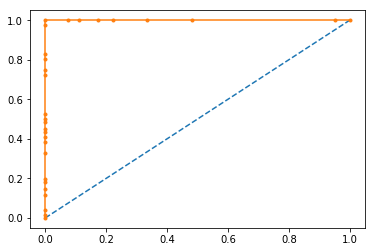

In [151]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

#### Precision and Recall curve 

f1=1.000 auc=1.000 ap=1.000


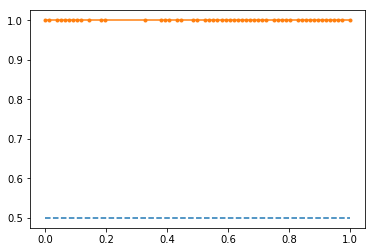

In [152]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = log_reg.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
y_prd_class_val = log_reg.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_prd_class_val)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, logreg_test_pred)
f1score = f1_score(y_test, logreg_test_pred)
recallscore= recall_score(y_test, logreg_test_pred)
precision =  precision_score(y_test, logreg_test_pred)
# adding vals to excel file that you created.

line = 'Logistic Regression' + ',' +str("penalty=l2 and c=1")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('GROUP3.csv','a')
f.write(line)
f.close()

## LINEAR SVC

The below model depicts the Linear SVM. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C. The best parameter for the Linear SVM is C=10 and which leaves the model with an accuracy =0.9936305732484076
and precision of 1 stating that the model has very less misclassifications.

In [154]:
from sklearn.svm import LinearSVC

In [155]:
c_range= [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [156]:
clf = LinearSVC()
linearsvc_grid_search = GridSearchCV(estimator=clf, param_grid = dict(C=c_range)   ,n_jobs=-1)
linearsvc_grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [157]:
linearsvc_grid_search.best_score_

0.9968051118210862

In [158]:
linearsvc_grid_search.best_params_

{'C': 1}

In [159]:
clf_best = LinearSVC(C=10)

In [160]:
linearsvc_grid_search.best_params_

{'C': 1}

In [161]:
clf_best = LinearSVC(C=10)

In [162]:
clf_best.fit(X_trainval, y_trainval)

clf_tr_pred = clf_best.predict(X_trainval)
clf_test_pred = clf_best.predict(X_test)

In [163]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, clf_tr_pred))
print("f1 score: ", f1_score(y_trainval, clf_tr_pred))
print("recall score: ", recall_score(y_trainval, clf_tr_pred))
print("precision: ", precision_score(y_trainval, clf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, clf_test_pred))
print("f1 score: ", f1_score(y_test, clf_test_pred))
print("recall score: ", recall_score(y_test, clf_test_pred))
print("precision: ", precision_score(y_test, clf_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Evaluation metrics

In [164]:
pd.crosstab(y_trainval, clf_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [165]:
pd.crosstab(y_test, clf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [166]:
report = classification_report(y_test, clf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, clf_test_pred)
f1score = f1_score(y_test, clf_test_pred)
recallscore= recall_score(y_test, clf_test_pred)
precision =  precision_score(y_test, clf_test_pred)
# adding vals to excel file that you created.

line = 'Linear SVC' + ',' +str("C=0.1")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('GROUP3.csv','a')
f.write(line)
f.close()

## SVC LINEAR KERNEL

The below model depicts the SVC Linear with Kernel. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C . The best parameter for the SVC Linear with Kernel is C=1 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications.


In [168]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [169]:
svc = SVC(kernel='linear')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range) ,n_jobs=-1)
grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [170]:
grid_search.best_score_

0.9984025559105432

In [171]:
grid_search.best_params_

{'C': 10}

In [172]:
svc_best = SVC(C=1.0, gamma='auto',probability=True)

In [173]:
svc_best.fit(X_trainval, y_trainval)

svc_tr_pred = svc_best.predict(X_trainval)
svc_test_pred = svc_best.predict(X_test)

In [174]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_tr_pred))
print("precision: ", precision_score(y_trainval, svc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_test_pred))
print("f1 score: ", f1_score(y_test, svc_test_pred))
print("recall score: ", recall_score(y_test, svc_test_pred))
print("precision: ", precision_score(y_test, svc_test_pred))

Train data
Accuracy score:  0.9957356076759062
f1 score:  0.9955947136563876
recall score:  0.9912280701754386
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


### Evaluation metrics

In [175]:
pd.crosstab(y_trainval, svc_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,2,226


In [176]:
pd.crosstab(y_test, svc_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [177]:
report = classification_report(y_test, svc_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



AUC: 1.000
[2.         1.         0.8709203  0.01267735 0.0126753  0.01252245
 0.01250062 0.01248918 0.01246643 0.01163565]


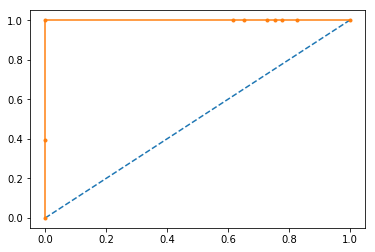

In [178]:
### ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = svc_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, svc_test_pred)
f1score = f1_score(y_test, svc_test_pred)
recallscore= recall_score(y_test, svc_test_pred)
precision =  precision_score(y_test, svc_test_pred)
# adding vals to excel file that you created.

line = 'SVC Kernel as linear' + ',' +str("C=1")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('GROUP3.csv','a')
f.write(line)
f.close()

## SVC Kernel RBF

The below model depicts the SVC with kernel=rbf. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C and gamma. The best parameter for the SVC with kernel=rbf is C=10 and gamma=0.5 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications.

In [180]:
#from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]
gamma_range=[0.001, 0.05,0.07,0.03,0.01,0.5,0.3, 0.1, 1, 10, 100]

param_grid = dict(C=c_range, gamma=gamma_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.05, 0.07, 0.03, 0.01, 0.5, 0.3, 0.1, 1, 10, 100]}


In [181]:
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,gamma=gamma_range) ,n_jobs=-1)
grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.05, 0.07, 0.03, 0.01, 0.5, 0.3, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [182]:
grid_search.best_score_

0.9984025559105432

In [183]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.5}

In [184]:
svc_best_rbf = SVC(kernel='rbf',C=1.0, gamma=0.5)

In [185]:
svc_best_rbf.fit(X_trainval, y_trainval)

svc_rbf_tr_pred = svc_best_rbf.predict(X_trainval)
svc_rbf_test_pred = svc_best_rbf.predict(X_test)

In [186]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_rbf_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_rbf_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_rbf_tr_pred))
print("precision: ", precision_score(y_trainval, svc_rbf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_rbf_test_pred))
print("f1 score: ", f1_score(y_test, svc_rbf_test_pred))
print("recall score: ", recall_score(y_test, svc_rbf_test_pred))
print("precision: ", precision_score(y_test, svc_rbf_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Evaluation metrics

In [187]:
pd.crosstab(y_trainval, svc_rbf_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [188]:
pd.crosstab(y_test, svc_rbf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [189]:
#Report


report = classification_report(y_test, svc_rbf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, svc_rbf_test_pred)
f1score = f1_score(y_test, svc_rbf_test_pred)
recallscore= recall_score(y_test, svc_rbf_test_pred)
precision =  precision_score(y_test, svc_rbf_test_pred)
# adding vals to excel file that you created.

line = 'SVC Kernel as rbf' + ',' +str("C=10 and gamma=0.5")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('GROUP3.csv','a')
f.write(line)
f.close()

## SVC kernel poly

The below model depicts the SVC with kernel=poly. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C and degree. The best parameter for the SVC with kernel=poly is C=10 and degree=1 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications

In [191]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]
degree_range=[1,2,3,4]

param_grid = dict(C=c_range, degree = degree_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]}


In [192]:
svc = SVC(kernel='poly')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,degree = degree_range) ,n_jobs=-1)
grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [193]:
grid_search.best_score_

0.9984025559105432

In [194]:
grid_search.best_params_

{'C': 100, 'degree': 1}

In [195]:
svc_best_poly = SVC(kernel='poly',C=1.0, degree=1)

In [196]:
svc_best_poly.fit(X_trainval, y_trainval)

svc_poly_tr_pred = svc_best_poly.predict(X_trainval)
svc_poly_test_pred = svc_best_poly.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [197]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_poly_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_poly_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_poly_tr_pred))
print("precision: ", precision_score(y_trainval, svc_poly_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_poly_test_pred))
print("f1 score: ", f1_score(y_test, svc_poly_test_pred))
print("recall score: ", recall_score(y_test, svc_poly_test_pred))
print("precision: ", precision_score(y_test, svc_poly_test_pred))

Train data
Accuracy score:  0.9829424307036247
f1 score:  0.9821428571428572
recall score:  0.9649122807017544
precision:  1.0
   
Test data
Accuracy score:  0.9745222929936306
f1 score:  0.972972972972973
recall score:  0.9473684210526315
precision:  1.0


#### Evaluation metrics

In [198]:
pd.crosstab(y_trainval, svc_poly_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,8,220


In [199]:
pd.crosstab(y_test, svc_rbf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [200]:
#Report


report = classification_report(y_test, svc_poly_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        81
           1       1.00      0.95      0.97        76

   micro avg       0.97      0.97      0.97       157
   macro avg       0.98      0.97      0.97       157
weighted avg       0.98      0.97      0.97       157



In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, svc_poly_test_pred)
f1score = f1_score(y_test, svc_poly_test_pred)
recallscore= recall_score(y_test, svc_poly_test_pred)
precision =  precision_score(y_test, svc_poly_test_pred)
# adding vals to excel file that you created.

line = 'SVC Kernel as poly' + ',' +str("C=10 and degree=1")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('GROUP3.csv','a')
f.write(line)
f.close()

## Decision Tree

The below model depicts the Decision Tree. The procedures GridSearchCV is used in the model to derive the best parameters i.e., max_depth. The best parameter for the Decision Tree is max_depth=4 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications

In [202]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
param_grid = dict(max_depth=[4,6,8,10])

gs_dt = GridSearchCV(dt, param_grid=param_grid, cv=10, scoring='accuracy')
gs_dt.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 6, 8, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [203]:
gs_dt.best_score_

0.9984025559105432

In [204]:
gs_dt.best_params_

{'max_depth': 4}

In [205]:
dt_best = DecisionTreeClassifier(max_depth=4)
dt_best.fit(X_trainval, y_trainval)
dt_pred = dt_best.predict(X_trainval)
dt_test_pred = dt_best.predict(X_test)



In [206]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, dt_pred))
print("f1 score: ", f1_score(y_trainval, dt_pred))
print("recall score: ", recall_score(y_trainval, dt_pred))
print("precision: ", precision_score(y_trainval, dt_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, dt_test_pred))
print("f1 score: ", f1_score(y_test, dt_test_pred))
print("recall score: ", recall_score(y_test, dt_test_pred))
print("precision: ", precision_score(y_test, dt_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [207]:
fea_imp = dt_best.feature_importances_
columns = X_trainval.columns
feat_cols = pd.DataFrame({'name_col':columns,'feat_imp':fea_imp})

Text(0.5, 0, 'Relative Importance')

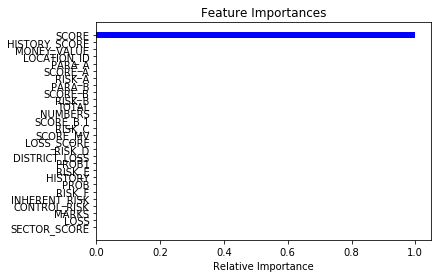

In [208]:
features=columns
importances = dt_best.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

#### Evaluation metrics

In [209]:
pd.crosstab(y_trainval, dt_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [210]:
pd.crosstab(y_test, dt_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [211]:
report = classification_report(y_test, dt_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



#### ROC curve 

AUC: 1.000
[2. 1. 0.]


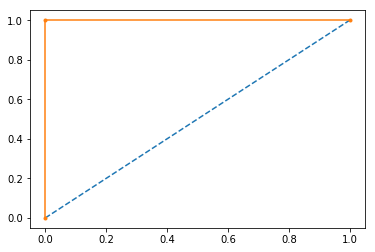

In [212]:
### ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = dt_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [213]:
#### Precision and recall curve
X_train.columns


Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE'],
      dtype='object')

f1=1.000 auc=1.000 ap=1.000


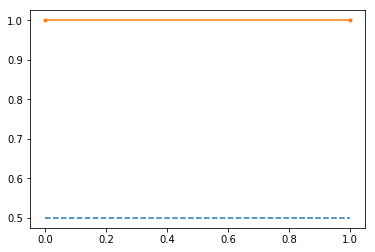

In [214]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = dt_best.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
y_prd_class_val = dt_best.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_prd_class_val)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, dt_test_pred)
f1score = f1_score(y_test, dt_test_pred)
recallscore= recall_score(y_test, dt_test_pred)
precision =  precision_score(y_test, dt_test_pred)
# adding vals to excel file that you created.

line = 'Decision Tree' + ',' +str("max_depth=4")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('GROUP3.csv','a')
f.write(line)
f.close()

In [216]:
### FROM ALL THE CLASSIFICATION MODELS IT CAN BE DEPICTED THAT EVERY CLASSIFICATION MODEL IS CLASSIFYING WITH VERY MINIMAL MISCLASSIFICATIONS OR NO CLASSIFICATIONS.RANDOM FOREST CLASSIFICATION IS ALSO BEING PERFORMED WHICH LEAVES US WITH THE HIGH CROSS VALDIATION SCORES.AS ALL THE MODELS ARE RUNNING WITHOUT ANY MISCLASSIFICATIONS ITS HARD TO COMMENT ON WHICH MODELS GIVES BEST FIT.

## RANDOM FOREST

In [217]:
from sklearn.ensemble import RandomForestClassifier

estimator = [20,50,70]
max_features_val= [10,15,20]

param_grid = dict(n_estimators=estimator, max_features=max_features_val)
print(param_grid)



{'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]}


In [218]:
randomforest = RandomForestClassifier()

rfgs = GridSearchCV(randomforest, param_grid = param_grid, cv=10, scoring='r2')
rfgs.fit(X,y)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [219]:
rfgs.best_score_

0.9936035676251332

In [220]:
rfgs.best_params_

{'max_features': 10, 'n_estimators': 20}

In [221]:
randomforest_best = RandomForestRegressor(n_estimators= 20,max_features= 20 )

In [222]:
randomforest_best.fit(X_trainval,y_trainval)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [223]:
features = randomforest_best.feature_importances_

In [224]:
cols = X_trainval.columns

In [225]:
feature_cols = pd.DataFrame(data=[cols,features])

In [226]:
feat_cols

,name_col,feat_imp
0,SECTOR_SCORE,0.0
1,LOCATION_ID,0.0
2,PARA_A,0.0
3,SCORE_A,0.0
4,RISK_A,0.0
5,PARA_B,0.0
6,SCORE_B,0.0
7,RISK_B,0.0
8,TOTAL,0.0
9,NUMBERS,0.0


Text(0.5, 0, 'Relative Importance')

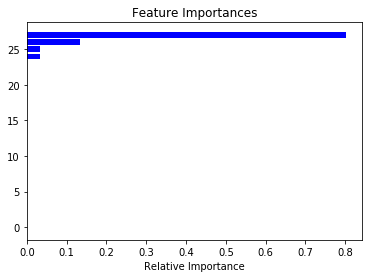

In [227]:
features=feature_columns
importances = randomforest_best.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(feat_cols[name_cols])
plt.xlabel('Relative Importance')